In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
import plotly.graph_objs as go
import plotly.offline as py
import researchpy as rp
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_excel('C:/Users/Nasibullah Qarizada/Desktop/data science/term project/AllDataARSAA.xlsx')

In [3]:

# Using multiple columns mean using DataFrame.mean()
RSS = dataset[["Total Usefulnes - RSS","Total Enjoyment - RSS", 
"Total Information - RSS", "Total Irritation - RSS", "Total Purchase Intention - RSS"]].mean()
print(RSS)

Total Usefulnes - RSS             2.874008
Total Enjoyment - RSS             2.817460
Total Information - RSS           2.920635
Total Irritation - RSS            2.226190
Total Purchase Intention - RSS    3.163690
dtype: float64


In [4]:

# Using multiple columns mean using DataFrame.mean()
ARSS = dataset[["Total Usefulnes - ARSS","Total Entertainment - ARSS", 
"Total Information - ARSS", "Total Irritation -ARSS", "Total Purchase Intention - ARSS", "Total Trust in Application - ARSS"]].mean()
print(ARSS)

Total Usefulnes - ARSS               3.241071
Total Entertainment - ARSS           3.096561
Total Information - ARSS             3.350529
Total Irritation -ARSS               2.482804
Total Purchase Intention - ARSS      3.059524
Total Trust in Application - ARSS    3.058862
dtype: float64


In [5]:

# Using multiple columns mean using DataFrame.mean()
EARSS = dataset[["Total Usefulnes - EARSS","Total Entertainment - EARSS", 
"Total Information - EARSS", "Total Irritation - EARSS", "Total Purchase Intention - EARSS", "Total Trust in Application - EARSS"]].mean()
print(EARSS)

Total Usefulnes - EARSS               3.365079
Total Entertainment - EARSS           3.167989
Total Information - EARSS             3.665344
Total Irritation - EARSS              2.458995
Total Purchase Intention - EARSS      3.120040
Total Trust in Application - EARSS    3.133598
dtype: float64


In [6]:
dataset.loc[dataset['What is your age?']<=27, 'Age SPSS'] = '18 to 27'
dataset.loc[dataset['What is your age?'].between(28,37), 'Age SPSS'] = '28 to 37'
dataset.loc[dataset['What is your age?'].between(38,47), 'Age SPSS'] = '38 to 47'
dataset.loc[dataset['What is your age?'].between(48,57), 'Age SPSS'] = '48 to 57'
dataset.loc[dataset['What is your age?'].between(58,67), 'Age SPSS'] = '58 to 67'
dataset.loc[dataset['What is your age?']>68, 'Age SPSS'] = '68 to 100'

In [7]:
dataset['Age SPSS'].value_counts()

28 to 37     70
38 to 47     66
18 to 27     64
48 to 57     36
58 to 67     14
68 to 100     1
Name: Age SPSS, dtype: int64

In [8]:
dataset['RSS Mean'] = (dataset['Total Usefulnes - RSS'] + dataset['Total Enjoyment - RSS'] + dataset['Total Information - RSS'] + dataset['Total Irritation - RSS'] + dataset['Total Purchase Intention - RSS']) / 5

In [9]:
dataset['ARSS Mean'] = (dataset['Total Usefulnes - ARSS'] + dataset['Total Entertainment - ARSS'] + dataset['Total Information - ARSS'] + dataset['Total Irritation -ARSS'] + dataset['Total Purchase Intention - ARSS'] + dataset['Total Trust in Application - ARSS']) / 6

In [10]:
dataset['EARSS Mean'] = (dataset['Total Usefulnes - EARSS'] + dataset['Total Entertainment - EARSS'] + dataset['Total Information - EARSS'] + dataset['Total Irritation - EARSS'] + dataset['Total Purchase Intention - EARSS'] + dataset['Total Trust in Application - EARSS']) / 6

In [11]:
dataset.loc[dataset['RSS Mean'] <= 1.5, 'rss mean'] = 1
dataset.loc[dataset['RSS Mean'].between(1.5,2.5), 'rss mean'] = 2
dataset.loc[dataset['RSS Mean'].between(2.5,3.5), 'rss mean'] = 3
dataset.loc[dataset['RSS Mean'].between(3.5,4.5), 'rss mean'] = 4
dataset.loc[dataset['RSS Mean'] >= 4.5, 'rss mean'] = 5

In [12]:
dataset.loc[dataset['ARSS Mean'] <= 1.5, 'arss mean'] = 1
dataset.loc[dataset['ARSS Mean'].between(1.5,2.5), 'arss mean'] = 2
dataset.loc[dataset['ARSS Mean'].between(2.5,3.5), 'arss mean'] = 3
dataset.loc[dataset['ARSS Mean'].between(3.5,4.5), 'arss mean'] = 4
dataset.loc[dataset['ARSS Mean'] >= 4.5, 'arss mean'] = 5

In [13]:
dataset.loc[dataset['EARSS Mean'] <= 1.5, 'earss mean'] = 1
dataset.loc[dataset['EARSS Mean'].between(1.5,2.5), 'earss mean'] = 2
dataset.loc[dataset['EARSS Mean'].between(2.5,3.5), 'earss mean'] = 3
dataset.loc[dataset['EARSS Mean'].between(3.5,4.5), 'earss mean'] = 4
dataset.loc[dataset['EARSS Mean'] >= 4.5, 'earss mean'] = 5

In [14]:
dataset['rss mean'].value_counts()

3.0    159
2.0     69
4.0     21
1.0      3
Name: rss mean, dtype: int64

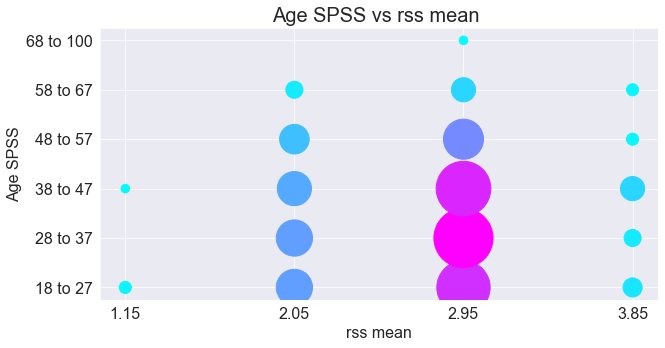

In [15]:
from bubble_plot.bubble_plot import bubble_plot
sns.set_style("darkgrid")
bubble_plot(dataset,'rss mean','Age SPSS', normalization_by_all=True)

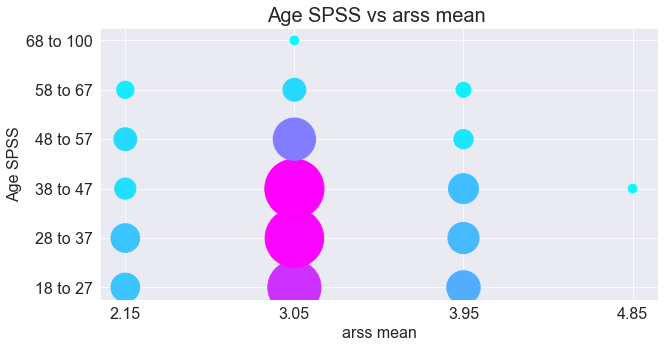

In [16]:
sns.set_style("darkgrid")
bubble_plot(dataset,'arss mean','Age SPSS', normalization_by_all=True)

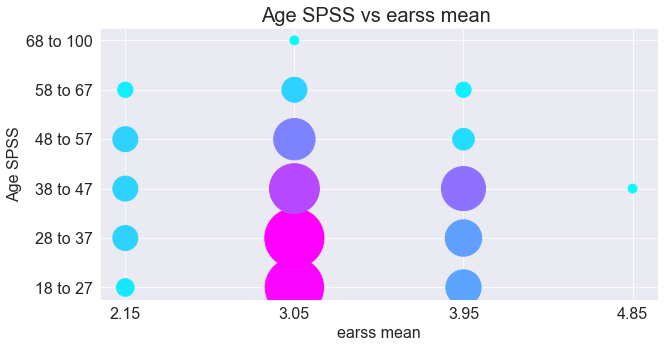

In [17]:
sns.set_style("darkgrid")
bubble_plot(dataset,'earss mean','Age SPSS', normalization_by_all=True)

In [18]:
print(dataset['Age SPSS'].unique())

['48 to 57' '18 to 27' '28 to 37' '38 to 47' '58 to 67' '68 to 100' nan]


In [19]:
dataset['arss mean'].value_counts()

3.0    163
4.0     49
2.0     39
5.0      1
Name: arss mean, dtype: int64

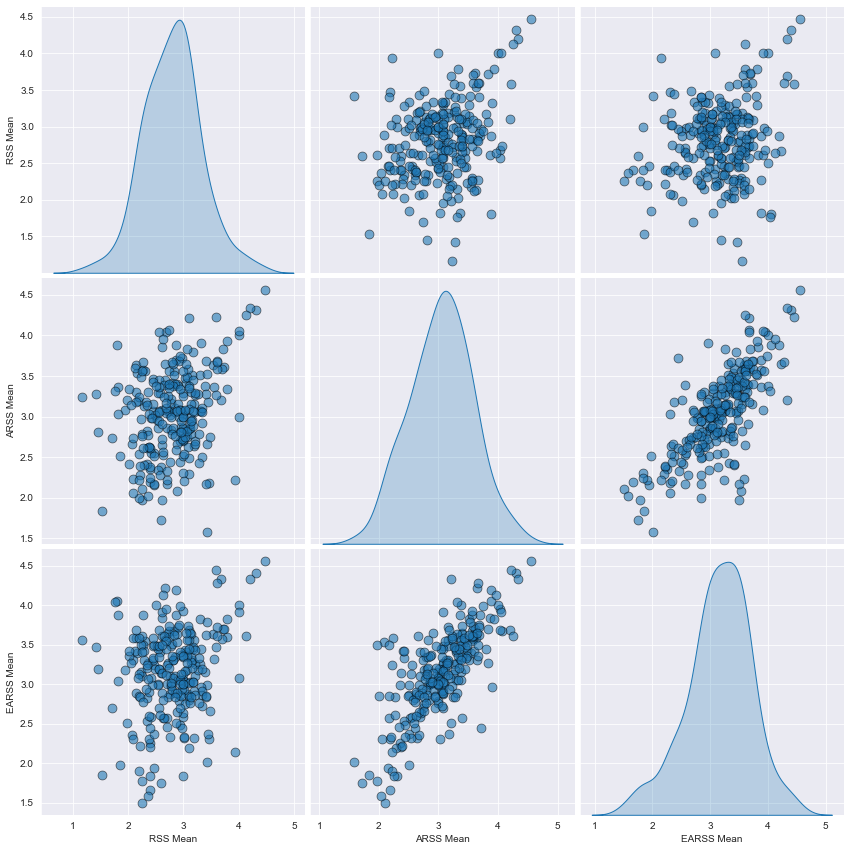

In [20]:
df = dataset[['RSS Mean','ARSS Mean','EARSS Mean']]


sns.pairplot(df, diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 4)
plt.show()


In [21]:
descriptives, results = rp.ttest(dataset["Total Usefulnes - RSS"], dataset["Total Usefulnes - ARSS"])
results

,Independent t-test,results
0,Difference (Total Usefulnes - RSS - Total Usef...,-0.3671
1,Degrees of freedom =,502.0000
2,t =,-4.7586
3,Two side test p value =,0.0000
4,Difference < 0 p value =,0.0000
5,Difference > 0 p value =,1.0000
6,Cohen's d =,-0.4239
7,Hedge's g =,-0.4233
8,Glass's delta1 =,-0.4616
9,Point-Biserial r =,-0.2078


In [22]:
descriptives, results = rp.ttest(dataset["Total Usefulnes - RSS"], dataset["Total Usefulnes - EARSS"])
results

,Independent t-test,results
0,Difference (Total Usefulnes - RSS - Total Usef...,-0.4911
1,Degrees of freedom =,502.0000
2,t =,-6.0802
3,Two side test p value =,0.0000
4,Difference < 0 p value =,0.0000
5,Difference > 0 p value =,1.0000
6,Cohen's d =,-0.5417
7,Hedge's g =,-0.5409
8,Glass's delta1 =,-0.6176
9,Point-Biserial r =,-0.2619


In [23]:
descriptives, results = rp.ttest(dataset["Total Usefulnes - ARSS"], dataset["Total Usefulnes - EARSS"])
results

,Independent t-test,results
0,Difference (Total Usefulnes - ARSS - Total Use...,-0.1240
1,Degrees of freedom =,502.0000
2,t =,-1.4362
3,Two side test p value =,0.1516
4,Difference < 0 p value =,0.0758
5,Difference > 0 p value =,0.9242
6,Cohen's d =,-0.1279
7,Hedge's g =,-0.1278
8,Glass's delta1 =,-0.1332
9,Point-Biserial r =,-0.0640


In [24]:
descriptives, results = rp.ttest(dataset['Total Enjoyment - RSS'], dataset["Total Entertainment - ARSS"])
results

,Independent t-test,results
0,Difference (Total Enjoyment - RSS - Total Ente...,-0.2791
1,Degrees of freedom =,502.0000
2,t =,-3.5976
3,Two side test p value =,0.0004
4,Difference < 0 p value =,0.0002
5,Difference > 0 p value =,0.9998
6,Cohen's d =,-0.3205
7,Hedge's g =,-0.3200
8,Glass's delta1 =,-0.3404
9,Point-Biserial r =,-0.1585


In [25]:
descriptives, results = rp.ttest(dataset['Total Enjoyment - RSS'], dataset["Total Entertainment - EARSS"])
results

,Independent t-test,results
0,Difference (Total Enjoyment - RSS - Total Ente...,-0.3505
1,Degrees of freedom =,502.0000
2,t =,-4.4367
3,Two side test p value =,0.0000
4,Difference < 0 p value =,0.0000
5,Difference > 0 p value =,1.0000
6,Cohen's d =,-0.3953
7,Hedge's g =,-0.3947
8,Glass's delta1 =,-0.4275
9,Point-Biserial r =,-0.1942


In [26]:
descriptives, results = rp.ttest(dataset['Total Entertainment - ARSS'], dataset["Total Entertainment - EARSS"])
results

,Independent t-test,results
0,Difference (Total Entertainment - ARSS - Total...,-0.0714
1,Degrees of freedom =,502.0000
2,t =,-0.8583
3,Two side test p value =,0.3912
4,Difference < 0 p value =,0.1956
5,Difference > 0 p value =,0.8044
6,Cohen's d =,-0.0765
7,Hedge's g =,-0.0763
8,Glass's delta1 =,-0.0777
9,Point-Biserial r =,-0.0383


In [27]:
descriptives, results = rp.ttest(dataset['Total Information - RSS'], dataset['Total Information - ARSS'])
results

,Independent t-test,results
0,Difference (Total Information - RSS - Total In...,-0.4299
1,Degrees of freedom =,502.0000
2,t =,-5.2798
3,Two side test p value =,0.0000
4,Difference < 0 p value =,0.0000
5,Difference > 0 p value =,1.0000
6,Cohen's d =,-0.4704
7,Hedge's g =,-0.4697
8,Glass's delta1 =,-0.4698
9,Point-Biserial r =,-0.2294


In [28]:
descriptives, results = rp.ttest(dataset['Total Information - RSS'], dataset['Total Information - EARSS'])
results

,Independent t-test,results
0,Difference (Total Information - RSS - Total In...,-0.7447
1,Degrees of freedom =,502.0000
2,t =,-9.4912
3,Two side test p value =,0.0000
4,Difference < 0 p value =,0.0000
5,Difference > 0 p value =,1.0000
6,Cohen's d =,-0.8455
7,Hedge's g =,-0.8443
8,Glass's delta1 =,-0.8138
9,Point-Biserial r =,-0.3901


In [29]:
descriptives, results = rp.ttest(dataset['Total Information - ARSS'], dataset['Total Information - EARSS'])
results

,Independent t-test,results
0,Difference (Total Information - ARSS - Total I...,-0.3148
1,Degrees of freedom =,502.0000
2,t =,-4.0176
3,Two side test p value =,0.0001
4,Difference < 0 p value =,0.0000
5,Difference > 0 p value =,1.0000
6,Cohen's d =,-0.3579
7,Hedge's g =,-0.3574
8,Glass's delta1 =,-0.3449
9,Point-Biserial r =,-0.1765


In [30]:
descriptives, results = rp.ttest(dataset['Total Irritation - RSS'], dataset['Total Irritation -ARSS'])
results

,Independent t-test,results
0,Difference (Total Irritation - RSS - Total Irr...,-0.2566
1,Degrees of freedom =,502.0000
2,t =,-3.1054
3,Two side test p value =,0.0020
4,Difference < 0 p value =,0.0010
5,Difference > 0 p value =,0.9990
6,Cohen's d =,-0.2766
7,Hedge's g =,-0.2762
8,Glass's delta1 =,-0.3039
9,Point-Biserial r =,-0.1373


In [31]:
descriptives, results = rp.ttest(dataset['Total Irritation - RSS'], dataset['Total Irritation - EARSS'])
results

,Independent t-test,results
0,Difference (Total Irritation - RSS - Total Irr...,-0.2328
1,Degrees of freedom =,502.0000
2,t =,-2.7587
3,Two side test p value =,0.0060
4,Difference < 0 p value =,0.0030
5,Difference > 0 p value =,0.9970
6,Cohen's d =,-0.2458
7,Hedge's g =,-0.2454
8,Glass's delta1 =,-0.2757
9,Point-Biserial r =,-0.1222


In [32]:
descriptives, results = rp.ttest(dataset['Total Irritation -ARSS'], dataset['Total Irritation - EARSS'])
results

,Independent t-test,results
0,Difference (Total Irritation -ARSS - Total Irr...,0.0238
1,Degrees of freedom =,502.0000
2,t =,0.2615
3,Two side test p value =,0.7938
4,Difference < 0 p value =,0.6031
5,Difference > 0 p value =,0.3969
6,Cohen's d =,0.0233
7,Hedge's g =,0.0233
8,Glass's delta1 =,0.0237
9,Point-Biserial r =,0.0117


In [33]:
descriptives, results = rp.ttest(dataset['Total Purchase Intention - RSS'], dataset['Total Purchase Intention - ARSS'])
results

,Independent t-test,results
0,Difference (Total Purchase Intention - RSS - T...,0.1042
1,Degrees of freedom =,502.0000
2,t =,1.3049
3,Two side test p value =,0.1925
4,Difference < 0 p value =,0.9037
5,Difference > 0 p value =,0.0963
6,Cohen's d =,0.1163
7,Hedge's g =,0.1161
8,Glass's delta1 =,0.1200
9,Point-Biserial r =,0.0581


In [34]:
descriptives, results = rp.ttest(dataset['Total Purchase Intention - RSS'], dataset['Total Purchase Intention - EARSS'])
results

,Independent t-test,results
0,Difference (Total Purchase Intention - RSS - T...,0.0437
1,Degrees of freedom =,502.0000
2,t =,0.5285
3,Two side test p value =,0.5974
4,Difference < 0 p value =,0.7013
5,Difference > 0 p value =,0.2987
6,Cohen's d =,0.0471
7,Hedge's g =,0.0470
8,Glass's delta1 =,0.0503
9,Point-Biserial r =,0.0236


In [35]:
descriptives, results = rp.ttest(dataset['Total Purchase Intention - EARSS'], dataset['Total Purchase Intention - ARSS'])
results

,Independent t-test,results
0,Difference (Total Purchase Intention - EARSS -...,0.0605
1,Degrees of freedom =,502.0000
2,t =,0.7124
3,Two side test p value =,0.4765
4,Difference < 0 p value =,0.7617
5,Difference > 0 p value =,0.2383
6,Cohen's d =,0.0635
7,Hedge's g =,0.0634
8,Glass's delta1 =,0.0616
9,Point-Biserial r =,0.0318


In [36]:
descriptives, results = rp.ttest(dataset['Total Trust in Application - ARSS'], dataset['Total Trust in Application - EARSS'])
results

,Independent t-test,results
0,Difference (Total Trust in Application - ARSS ...,-0.0747
1,Degrees of freedom =,502.0000
2,t =,-1.2448
3,Two side test p value =,0.2138
4,Difference < 0 p value =,0.1069
5,Difference > 0 p value =,0.8931
6,Cohen's d =,-0.1109
7,Hedge's g =,-0.1107
8,Glass's delta1 =,-0.1141
9,Point-Biserial r =,-0.0555


**Distrubtions in RSS**

In [37]:
from scipy.stats import anderson
data = dataset['Total Usefulnes - RSS']
result = anderson(data)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < cv:
		print('Probably Gaussian at the %.1f%% level' % (sl))
	else:
		print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=1.861
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level


In [38]:
from scipy.stats import normaltest

data = dataset['Total Usefulnes - RSS']
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f\n' % (stat, p))
if p > 0.05:
    print('Gaussian')
else:
    print('Not Gaussian')

stat=3.211, p=0.201

Gaussian


In [39]:
import pingouin as pg
pg.normality(dataset['Total Usefulnes - RSS'])

,W,pval,normal
Total Usefulnes - RSS,0.979815,0.001196,False


In [40]:
data = dataset['Total Enjoyment - RSS']
result = anderson(data)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < cv:
		print('Probably Gaussian at the %.1f%% level' % (sl))
	else:
		print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=2.447
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level


In [41]:
from scipy.stats import normaltest

data = dataset['Total Enjoyment - RSS']
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f\n' % (stat, p))
if p > 0.05:
    print('Gaussian')
else:
    print('Not Gaussian')

stat=0.283, p=0.868

Gaussian


In [42]:
pg.normality(dataset['Total Enjoyment - RSS'])

,W,pval,normal
Total Enjoyment - RSS,0.976433,0.00034,False


In [43]:
data = dataset['Total Information - RSS']
result = anderson(data)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < cv:
		print('Probably Gaussian at the %.1f%% level' % (sl))
	else:
		print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=2.616
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level


In [44]:
from scipy.stats import normaltest

data = dataset['Total Information - RSS']
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f\n' % (stat, p))
if p > 0.05:
    print('Gaussian')
else:
    print('Not Gaussian')

stat=7.067, p=0.029

Not Gaussian


In [45]:
pg.normality(dataset['Total Information - RSS'])

,W,pval,normal
Total Information - RSS,0.971525,0.000062,False


In [46]:
data = dataset['Total Irritation - RSS']
result = anderson(data)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < cv:
		print('Probably Gaussian at the %.1f%% level' % (sl))
	else:
		print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=3.177
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level


In [47]:
from scipy.stats import normaltest

data = dataset['Total Irritation - RSS']
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f\n' % (stat, p))
if p > 0.05:
    print('Gaussian')
else:
    print('Not Gaussian')

stat=7.410, p=0.025

Not Gaussian


In [48]:
pg.normality(dataset['Total Irritation - RSS'])

,W,pval,normal
Total Irritation - RSS,0.953801,3.453760e-07,False


In [49]:
data = dataset['Total Purchase Intention - RSS']
result = anderson(data)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < cv:
		print('Probably Gaussian at the %.1f%% level' % (sl))
	else:
		print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=1.968
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level


In [50]:
from scipy.stats import normaltest

data = dataset['Total Purchase Intention - RSS']
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f\n' % (stat, p))
if p > 0.05:
    print('Gaussian')
else:
    print('Not Gaussian')

stat=2.920, p=0.232

Gaussian


In [51]:
pg.normality(dataset['Total Purchase Intention - RSS'])

,W,pval,normal
Total Purchase Intention - RSS,0.976647,0.000368,False


In [52]:
data = dataset['RSS Mean']
result = anderson(data)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < cv:
		print('Probably Gaussian at the %.1f%% level' % (sl))
	else:
		print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=0.508
Probably Gaussian at the 15.0% level
Probably Gaussian at the 10.0% level
Probably Gaussian at the 5.0% level
Probably Gaussian at the 2.5% level
Probably Gaussian at the 1.0% level


In [53]:
from scipy.stats import normaltest

data = dataset['RSS Mean']
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f\n' % (stat, p))
if p > 0.05:
    print('Gaussian')
else:
    print('Not Gaussian')

stat=3.624, p=0.163

Gaussian


In [54]:
pg.normality(dataset['RSS Mean'])

,W,pval,normal
RSS Mean,0.992657,0.247257,True


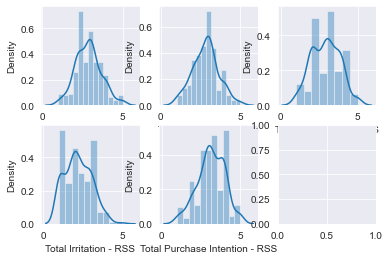

In [55]:


fig, ax =plt.subplots(2,3)
sns.distplot(dataset['Total Usefulnes - RSS'], ax=ax[0,0])
sns.distplot(dataset['Total Enjoyment - RSS'], ax=ax[0,1])
sns.distplot(dataset['Total Information - RSS'], ax=ax[0,2])
sns.distplot(dataset['Total Irritation - RSS'], ax=ax[1,0])
sns.distplot(dataset['Total Purchase Intention - RSS'], ax = ax[1,1])
sns.set(rc={'figure.figsize':(25.0,8.0)})
fig.show()

**Distrubtions in ARSS**

In [56]:
data = dataset['Total Usefulnes - ARSS']
result = anderson(data)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < cv:
		print('Probably Gaussian at the %.1f%% level' % (sl))
	else:
		print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=3.257
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level


In [147]:
from scipy.stats import normaltest

data = dataset['Total Usefulnes - ARSS']
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f\n' % (stat, p))
if p > 0.05:
    print('Gaussian')
else:
    print('Not Gaussian')


stat=13.280, p=0.001

Not Gaussian
0.0013068630235106692


In [58]:
pg.normality(dataset['Total Usefulnes - ARSS'])

,W,pval,normal
Total Usefulnes - ARSS,0.965436,0.000009,False


In [59]:
data = dataset['Total Entertainment - ARSS']
result = anderson(data)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < cv:
		print('Probably Gaussian at the %.1f%% level' % (sl))
	else:
		print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=2.018
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level


In [60]:
from scipy.stats import normaltest

data = dataset['Total Entertainment - ARSS']
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f\n' % (stat, p))
if p > 0.05:
    print('Gaussian')
else:
    print('Not Gaussian')

stat=2.573, p=0.276

Gaussian


In [61]:
pg.normality(dataset['Total Entertainment - ARSS'])

,W,pval,normal
Total Entertainment - ARSS,0.976038,0.000295,False


In [62]:
data = dataset['Total Information - ARSS']
result = anderson(data)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < cv:
		print('Probably Gaussian at the %.1f%% level' % (sl))
	else:
		print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=3.941
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level


In [63]:
from scipy.stats import normaltest

data = dataset['Total Information - ARSS']
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f\n' % (stat, p))
if p > 0.05:
    print('Gaussian')
else:
    print('Not Gaussian')

stat=12.555, p=0.002

Not Gaussian


In [64]:
pg.normality(dataset['Total Information - ARSS'])

,W,pval,normal
Total Information - ARSS,0.952571,2.515598e-07,False


In [65]:
data = dataset['Total Irritation -ARSS']
result = anderson(data)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < cv:
		print('Probably Gaussian at the %.1f%% level' % (sl))
	else:
		print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=3.540
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level


In [66]:
from scipy.stats import normaltest

data = dataset['Total Irritation -ARSS']
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f\n' % (stat, p))
if p > 0.05:
    print('Gaussian')
else:
    print('Not Gaussian')

stat=21.744, p=0.000

Not Gaussian


In [67]:
pg.normality(dataset['Total Irritation -ARSS'])

,W,pval,normal
Total Irritation -ARSS,0.951589,1.960070e-07,False


In [68]:
data = dataset['Total Purchase Intention - ARSS']
result = anderson(data)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < cv:
		print('Probably Gaussian at the %.1f%% level' % (sl))
	else:
		print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=2.661
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level


In [69]:
from scipy.stats import normaltest

data = dataset['Total Purchase Intention - ARSS']
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f\n' % (stat, p))
if p > 0.05:
    print('Gaussian')
else:
    print('Not Gaussian')

stat=5.665, p=0.059

Gaussian


In [70]:
pg.normality(dataset['Total Purchase Intention - ARSS'])

,W,pval,normal
Total Purchase Intention - ARSS,0.967985,0.00002,False


In [71]:
data = dataset['Total Trust in Application - ARSS']
result = anderson(data)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < cv:
		print('Probably Gaussian at the %.1f%% level' % (sl))
	else:
		print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=0.876
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably Gaussian at the 2.5% level
Probably Gaussian at the 1.0% level


In [72]:
from scipy.stats import normaltest

data = dataset['Total Trust in Application - ARSS']
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f\n' % (stat, p))
if p > 0.05:
    print('Gaussian')
else:
    print('Not Gaussian')

stat=0.246, p=0.884

Gaussian


In [73]:
pg.normality(dataset['Total Trust in Application - ARSS'])

,W,pval,normal
Total Trust in Application - ARSS,0.99196,0.185607,True


In [74]:
data = dataset['ARSS Mean']
result = anderson(data)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < cv:
		print('Probably Gaussian at the %.1f%% level' % (sl))
	else:
		print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=0.257
Probably Gaussian at the 15.0% level
Probably Gaussian at the 10.0% level
Probably Gaussian at the 5.0% level
Probably Gaussian at the 2.5% level
Probably Gaussian at the 1.0% level


In [75]:
from scipy.stats import normaltest

data = dataset['ARSS Mean']
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f\n' % (stat, p))
if p > 0.05:
    print('Gaussian')
else:
    print('Not Gaussian')

stat=0.127, p=0.938

Gaussian


In [76]:
pg.normality(dataset['ARSS Mean'])

,W,pval,normal
ARSS Mean,0.996907,0.90806,True


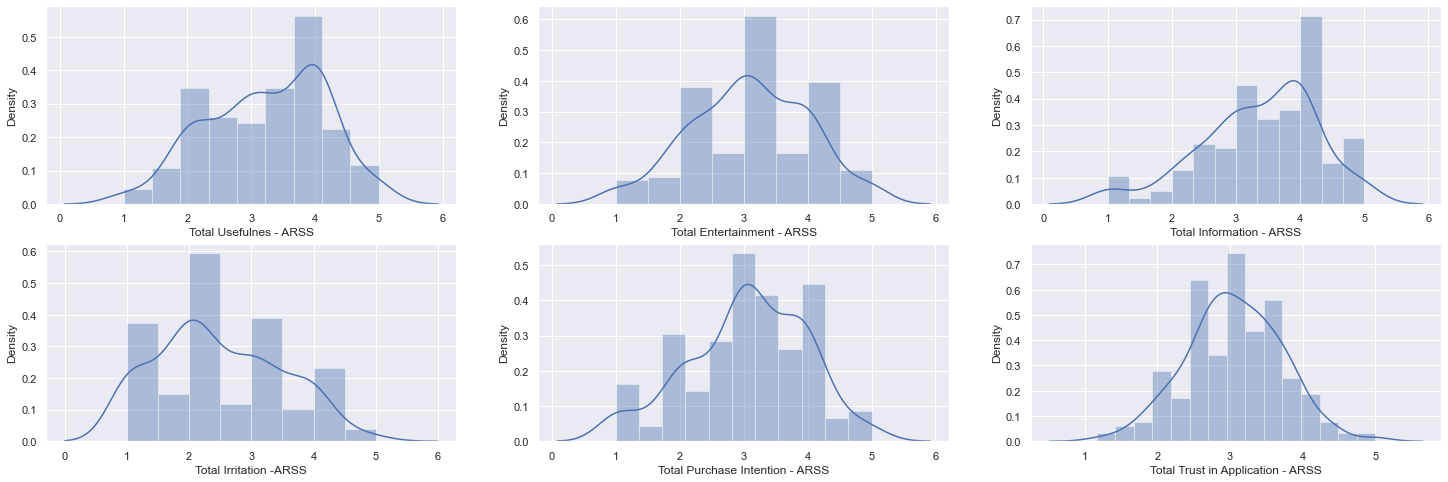

In [77]:
fig, ax =plt.subplots(2,3)
sns.distplot(dataset['Total Usefulnes - ARSS'], ax=ax[0,0])
sns.distplot(dataset['Total Entertainment - ARSS'], ax=ax[0,1])
sns.distplot(dataset['Total Information - ARSS'], ax=ax[0,2])
sns.distplot(dataset['Total Irritation -ARSS'], ax=ax[1,0])
sns.distplot(dataset['Total Purchase Intention - ARSS'], ax = ax[1,1])
sns.distplot(dataset['Total Trust in Application - ARSS'], ax = ax[1,2])

sns.set(rc={'figure.figsize':(25.0,8.0)})
fig.show()

<AxesSubplot:xlabel='ARSS Mean', ylabel='Density'>

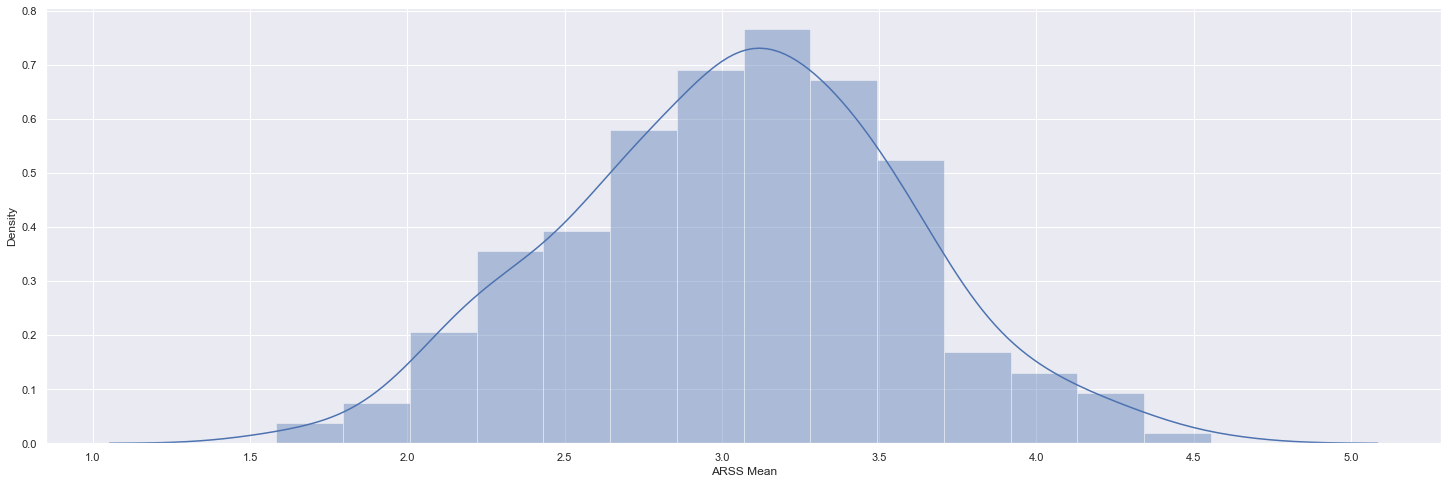

In [78]:
sns.distplot(dataset['ARSS Mean'])


In [79]:
data = dataset['Total Usefulnes - EARSS']
result = anderson(data)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < cv:
		print('Probably Gaussian at the %.1f%% level' % (sl))
	else:
		print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=4.130
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level


In [80]:
from scipy.stats import normaltest

data = dataset['Total Usefulnes - EARSS']
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f\n' % (stat, p))
if p > 0.05:
    print('Gaussian')
else:
    print('Not Gaussian')

stat=13.903, p=0.001

Not Gaussian


In [81]:
pg.normality(dataset['Total Usefulnes - EARSS'])

,W,pval,normal
Total Usefulnes - EARSS,0.94777,7.624691e-08,False


In [82]:
data = dataset['Total Entertainment - EARSS']
result = anderson(data)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < cv:
		print('Probably Gaussian at the %.1f%% level' % (sl))
	else:
		print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=2.639
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level


In [83]:
from scipy.stats import normaltest

data = dataset['Total Entertainment - EARSS']
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f\n' % (stat, p))
if p > 0.05:
    print('Gaussian')
else:
    print('Not Gaussian')

stat=4.986, p=0.083

Gaussian


In [84]:
pg.normality(dataset['Total Entertainment - EARSS'])

,W,pval,normal
Total Entertainment - EARSS,0.968408,0.000023,False


In [85]:
data = dataset['Total Information - EARSS']
result = anderson(data)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < cv:
		print('Probably Gaussian at the %.1f%% level' % (sl))
	else:
		print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=4.745
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level


In [86]:
from scipy.stats import normaltest

data = dataset['Total Information - EARSS']
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f\n' % (stat, p))
if p > 0.05:
    print('Gaussian')
else:
    print('Not Gaussian')

stat=23.123, p=0.000

Not Gaussian


In [87]:
pg.normality(dataset['Total Information - EARSS'])

,W,pval,normal
Total Information - EARSS,0.937258,6.880334e-09,False


In [88]:
data = dataset['Total Irritation - EARSS']
result = anderson(data)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < cv:
		print('Probably Gaussian at the %.1f%% level' % (sl))
	else:
		print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=3.288
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level


In [89]:
from scipy.stats import normaltest

data = dataset['Total Irritation - EARSS']
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f\n' % (stat, p))
if p > 0.05:
    print('Gaussian')
else:
    print('Not Gaussian')

stat=12.177, p=0.002

Not Gaussian


In [90]:
pg.normality(dataset['Total Irritation - EARSS'])

,W,pval,normal
Total Irritation - EARSS,0.948593,9.312846e-08,False


In [91]:
data = dataset['Total Purchase Intention - EARSS']
result = anderson(data)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < cv:
		print('Probably Gaussian at the %.1f%% level' % (sl))
	else:
		print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=2.824
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level


In [92]:
from scipy.stats import normaltest

data = dataset['Total Purchase Intention - EARSS']
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f\n' % (stat, p))
if p > 0.05:
    print('Gaussian')
else:
    print('Not Gaussian')

stat=6.380, p=0.041

Not Gaussian


In [93]:
pg.normality(dataset['Total Purchase Intention - EARSS'])

,W,pval,normal
Total Purchase Intention - EARSS,0.963666,0.000005,False


In [94]:
data = dataset['Total Trust in Application - EARSS']
result = anderson(data)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < cv:
		print('Probably Gaussian at the %.1f%% level' % (sl))
	else:
		print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=1.422
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level


In [95]:
from scipy.stats import normaltest

data = dataset['Total Trust in Application - EARSS']
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f\n' % (stat, p))
if p > 0.05:
    print('Gaussian')
else:
    print('Not Gaussian')

stat=1.706, p=0.426

Gaussian


In [96]:
pg.normality(dataset['Total Trust in Application - EARSS'])

,W,pval,normal
Total Trust in Application - EARSS,0.982534,0.003468,False


In [97]:
data = dataset['EARSS Mean']
result = anderson(data)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < cv:
		print('Probably Gaussian at the %.1f%% level' % (sl))
	else:
		print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=1.246
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level


In [98]:
from scipy.stats import normaltest

data = dataset['EARSS Mean']
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f\n' % (stat, p))
if p > 0.05:
    print('Gaussian')
else:
    print('Not Gaussian')

stat=8.365, p=0.015

Not Gaussian


In [99]:
pg.normality(dataset['EARSS Mean'])

,W,pval,normal
EARSS Mean,0.983691,0.005535,False


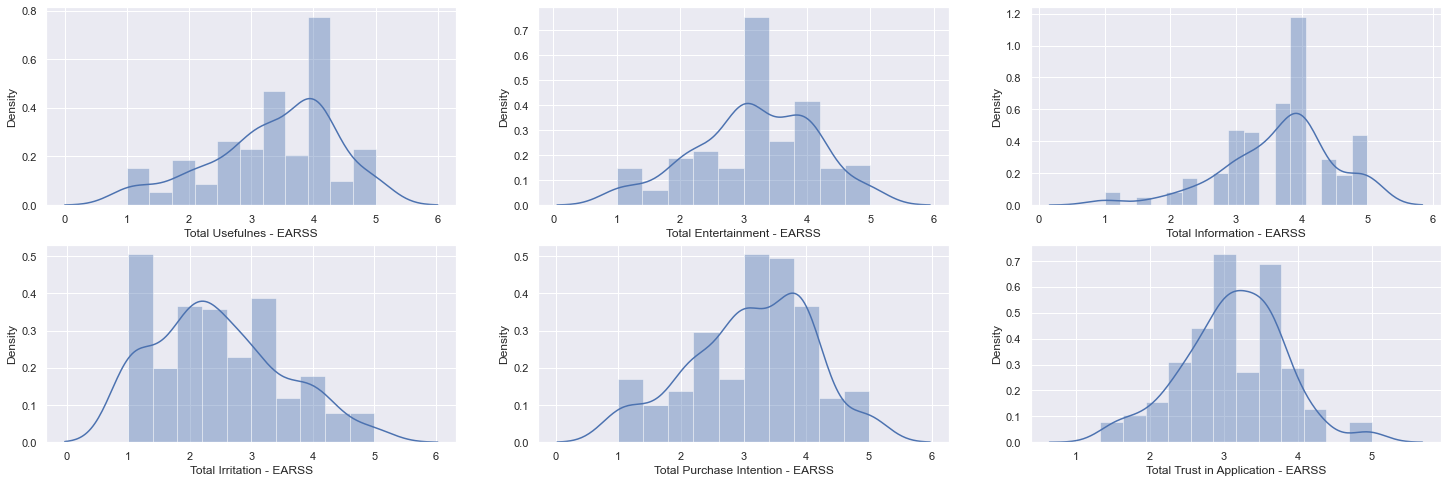

In [100]:
fig, ax =plt.subplots(2,3)
sns.distplot(dataset['Total Usefulnes - EARSS'], ax=ax[0,0])
sns.distplot(dataset['Total Entertainment - EARSS'], ax=ax[0,1])
sns.distplot(dataset['Total Information - EARSS'], ax=ax[0,2])
sns.distplot(dataset['Total Irritation - EARSS'], ax=ax[1,0])
sns.distplot(dataset['Total Purchase Intention - EARSS'], ax = ax[1,1])
sns.distplot(dataset['Total Trust in Application - EARSS'], ax = ax[1,2])

sns.set(rc={'figure.figsize':(25.0,8.0)})
fig.show()

<AxesSubplot:xlabel='EARSS Mean', ylabel='Density'>

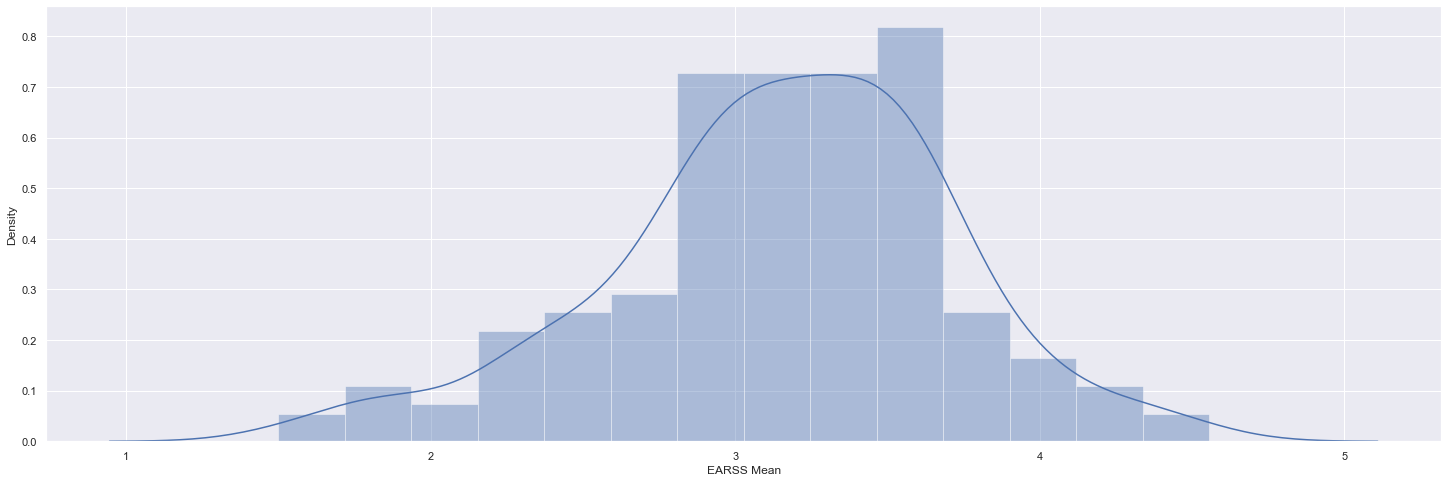

In [101]:
sns.distplot(dataset['EARSS Mean'])

In [102]:
# import statsmodels.api as sm

# lognorm_dataset =dataset['RSS Mean']
# fig = sm.qqplot(lognorm_dataset, line='45')
# plt.show()



# # #Gerekli midir??


In [103]:
dataset.at[152,'Age spss']= 3

In [104]:
dataset.loc[dataset['Age SPSS'] == '18 to 27', 'Age spss'] = 1
dataset.loc[dataset['Age SPSS'] == '28 to 37', 'Age spss'] = 2
dataset.loc[dataset['Age SPSS'] == '38 to 47', 'Age spss'] = 3
dataset.loc[dataset['Age SPSS'] == '48 to 57', 'Age spss'] = 4
dataset.loc[dataset['Age SPSS'] == '58 to 67', 'Age spss'] = 5
dataset.loc[dataset['Age SPSS'] == '68 to 100', 'Age spss'] = 6

In [105]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau

list1 = dataset['Total Usefulnes - RSS']
list2 = dataset['Total Usefulnes - ARSS']
list3 = dataset['Total Usefulnes - EARSS']

list4 = dataset['Total Enjoyment - RSS']
list5 = dataset['Total Entertainment - ARSS']
list6 = dataset['Total Entertainment - EARSS']

list7 = dataset['Total Information - RSS']
list8 = dataset['Total Information - ARSS']
list9 = dataset['Total Information - EARSS']

list10 = dataset['Total Irritation - RSS']
list11 = dataset['Total Irritation -ARSS']
list12 = dataset['Total Irritation - EARSS']

list13 = dataset['Total Purchase Intention - RSS']
list14 = dataset['Total Purchase Intention - ARSS']
list15 = dataset['Total Purchase Intention - EARSS']

list16 = dataset['Total Trust in Application - ARSS']
list17 = dataset['Total Trust in Application - EARSS']

list18 = dataset['Age spss']
list19 = dataset['RSS Mean']
list20 = dataset['ARSS Mean']
list21 = dataset['EARSS Mean']

 
# Apply the pearsonr()
corr1, _ = pearsonr(list1, list2)
corr2, _ = pearsonr(list1, list3)
corr3, _ = pearsonr(list2, list3)

corr4, _ = pearsonr(list4, list5)
corr5, _ = pearsonr(list4, list6)
corr6, _ = pearsonr(list5, list6)

corr7, _ = pearsonr(list7, list8)
corr8, _ = pearsonr(list7, list9)
corr9, _ = pearsonr(list8, list9)

corr10, _ = pearsonr(list10, list11)
corr11, _ = pearsonr(list10, list12)
corr12, _ = pearsonr(list11, list12)

corr13, _ = pearsonr(list13, list14)
corr14, _ = pearsonr(list13, list15)
corr15, _ = pearsonr(list14, list15)

corr16, _ = pearsonr(list16, list17)


corr17, _ = pearsonr(list18, list19)
corr18, _ = pearsonr(list18, list20)
corr19, _ = pearsonr(list18, list21)



print('Pearsons correlation: %.3f' % corr1)
print('Pearsons correlation: %.3f' % corr2)
print('Pearsons correlation: %.3f' % corr3)
print('Pearsons correlation: %.3f' % corr4)
print('Pearsons correlation: %.3f' % corr5)
print('Pearsons correlation: %.3f' % corr6)
print('Pearsons correlation: %.3f' % corr7)
print('Pearsons correlation: %.3f' % corr8)
print('Pearsons correlation: %.3f' % corr9)
print('Pearsons correlation: %.3f' % corr10)
print('Pearsons correlation: %.3f' % corr11)
print('Pearsons correlation: %.3f' % corr12)
print('Pearsons correlation: %.3f' % corr13)
print('Pearsons correlation: %.3f' % corr14)
print('Pearsons correlation: %.3f' % corr15)

print('Pearsons correlation: %.3f' % corr16)

print('Pearsons correlation: %.3f' % corr17)
print('Pearsons correlation: %.3f' % corr18)
print('Pearsons correlation: %.3f' % corr19)



Pearsons correlation: 0.104
Pearsons correlation: 0.046
Pearsons correlation: 0.737
Pearsons correlation: 0.334
Pearsons correlation: 0.252
Pearsons correlation: 0.662
Pearsons correlation: 0.236
Pearsons correlation: 0.077
Pearsons correlation: 0.545
Pearsons correlation: 0.214
Pearsons correlation: 0.199
Pearsons correlation: 0.694
Pearsons correlation: 0.287
Pearsons correlation: 0.209
Pearsons correlation: 0.791
Pearsons correlation: 0.772
Pearsons correlation: 0.019
Pearsons correlation: -0.021
Pearsons correlation: -0.103


In [106]:
# coef, p = spearmanr(list1, list2)

coef1, p = spearmanr(list1, list2)
coef2, p = spearmanr(list1, list3)
coef3, p = spearmanr(list2, list3)

coef4, p = spearmanr(list4, list5)
coef5, p = spearmanr(list4, list6)
coef6, p = spearmanr(list5, list6)

coef7, p = spearmanr(list7, list8)
coef8, p = spearmanr(list7, list9)
coef9, p = spearmanr(list8, list9)

coef10, p = spearmanr(list10, list11)
coef11, p = spearmanr(list10, list12)
coef12, p = spearmanr(list11, list12)

coef13, p = spearmanr(list13, list14)
coef14, p = spearmanr(list13, list15)
coef15, p = spearmanr(list14, list15)

coef16, p = spearmanr(list16, list17)


coef17, p = spearmanr(list18, list19)
coef18, p = spearmanr(list18, list20)
coef19, p = spearmanr(list18, list21)

print('spearmanr correlation: %.3f' % coef1)
print('spearmanr correlation: %.3f' % coef2)
print('spearmanr correlation: %.3f' % coef3)
print('spearmanr correlation: %.3f' % coef4)
print('spearmanr correlation: %.3f' % coef5)
print('spearmanr correlation: %.3f' % coef6)
print('spearmanr correlation: %.3f' % coef7)
print('spearmanr correlation: %.3f' % coef8)
print('spearmanr correlation: %.3f' % coef9)
print('spearmanr correlation: %.3f' % coef10)
print('spearmanr correlation: %.3f' % coef11)
print('spearmanr correlation: %.3f' % coef12)
print('spearmanr correlation: %.3f' % coef13)
print('spearmanr correlation: %.3f' % coef14)
print('spearmanr correlation: %.3f' % coef15)

print('spearmanr correlation: %.3f' % coef16)

print('spearmanr correlation: %.3f' % coef17)
print('spearmanr correlation: %.3f' % coef18)
print('spearmanr correlation: %.3f' % coef19)

spearmanr correlation: 0.087
spearmanr correlation: 0.010
spearmanr correlation: 0.717
spearmanr correlation: 0.276
spearmanr correlation: 0.177
spearmanr correlation: 0.648
spearmanr correlation: 0.228
spearmanr correlation: 0.042
spearmanr correlation: 0.530
spearmanr correlation: 0.243
spearmanr correlation: 0.222
spearmanr correlation: 0.687
spearmanr correlation: 0.233
spearmanr correlation: 0.158
spearmanr correlation: 0.774
spearmanr correlation: 0.746
spearmanr correlation: -0.014
spearmanr correlation: -0.013
spearmanr correlation: -0.079


In [107]:
kendal1, _ = kendalltau(list1, list2)
kendal2, _ = kendalltau(list1, list3)
kendal3, _ = kendalltau(list2, list3)

kendal4, _ = kendalltau(list4, list5)
kendal5, _ = kendalltau(list4, list6)
kendal6, _ = kendalltau(list5, list6)

kendal7, _ = kendalltau(list7, list8)
kendal8, _ = kendalltau(list7, list9)
kendal9, _ = kendalltau(list8, list9)

kendal10, _ = kendalltau(list10, list11)
kendal11, _ = kendalltau(list10, list12)
kendal12, _ = kendalltau(list11, list12)

kendal13, _ = kendalltau(list13, list14)
kendal14, _ = kendalltau(list13, list15)
kendal15, _ = kendalltau(list14, list15)

kendal16, _ = kendalltau(list16, list17)


kendal17, _ = kendalltau(list18, list19)
kendal18, _ = kendalltau(list18, list20)
kendal19, _ = kendalltau(list18, list21)


print('kendaltau correlation: %.3f' % kendal1)
print('kendaltau correlation: %.3f' % kendal2)
print('kendaltau correlation: %.3f' % kendal3)
print('kendaltau correlation: %.3f' % kendal4)
print('kendaltau correlation: %.3f' % kendal5)
print('kendaltau correlation: %.3f' % kendal6)
print('kendaltau correlation: %.3f' % kendal7)
print('kendaltau correlation: %.3f' % kendal8)
print('kendaltau correlation: %.3f' % kendal9)
print('kendaltau correlation: %.3f' % kendal10)
print('kendaltau correlation: %.3f' % kendal11)
print('kendaltau correlation: %.3f' % kendal12)
print('kendaltau correlation: %.3f' % kendal13)
print('kendaltau correlation: %.3f' % kendal14)
print('kendaltau correlation: %.3f' % kendal15)

print('kendaltau correlation: %.3f' % kendal16)

print('kendaltau correlation: %.3f' % kendal17)
print('kendaltau correlation: %.3f' % kendal18)
print('kendaltau correlation: %.3f' % kendal19)

kendaltau correlation: 0.066
kendaltau correlation: 0.002
kendaltau correlation: 0.587
kendaltau correlation: 0.217
kendaltau correlation: 0.137
kendaltau correlation: 0.539
kendaltau correlation: 0.176
kendaltau correlation: 0.032
kendaltau correlation: 0.428
kendaltau correlation: 0.185
kendaltau correlation: 0.171
kendaltau correlation: 0.566
kendaltau correlation: 0.176
kendaltau correlation: 0.117
kendaltau correlation: 0.651
kendaltau correlation: 0.605
kendaltau correlation: -0.011
kendaltau correlation: -0.010
kendaltau correlation: -0.058


In [108]:
# from scipy.stats import chi2_contingency
  
# listN1 = dataset['Total Usefulnes - RSS']
# listN2 = dataset['Total Usefulnes - ARSS']
# listN3 = dataset['Total Usefulnes - EARSS']

# listN4 = dataset['Total Enjoyment - RSS']
# listN5 = dataset['Total Entertainment - ARSS']
# listN6 = dataset['Total Entertainment - EARSS']

# listN7 = dataset['Total Information - RSS']
# listN8 = dataset['Total Information - ARSS']
# listN9 = dataset['Total Information - EARSS']

# listN10 = dataset['Total Irritation - RSS']
# listN11 = dataset['Total Irritation -ARSS']
# listN12 = dataset['Total Irritation - EARSS']

# listN13 = dataset['Total Purchase Intention - RSS']
# listN14 = dataset['Total Purchase Intention - ARSS']
# listN15 = dataset['Total Purchase Intention - EARSS']

# listN16 = dataset['Total Trust in Application - ARSS']
# listN17 = dataset['Total Trust in Application - EARSS']


# data1 =(listN1, listN2)
# data2 =(listN1, listN3)
# data3 =(listN2, listN3)

# data4 =(listN4, listN5)
# data5 =(listN4, listN6)
# data6 =(listN5, listN6)

# data7 =(listN7, listN8)
# data8 =(listN7, listN9)
# data9 =(listN8, listN9)

# data10 =(listN10, listN11)
# data11 =(listN10, listN12)
# data12 =(listN11, listN12)

# data13 =(listN13, listN14)
# data14 =(listN13, listN15)
# data15 =(listN14, listN15)

# data16 =(listN16, listN17)


# stat, p, dof, expected = chi2_contingency(data1)
# alpha = 0.05
# print("p value is " + str(p))
# if p <= alpha:
#     print('Dependent (reject H0)')
# else:
#     print('Independent (H0 holds true)')



# stat, p, dof, expected = chi2_contingency(data2)
# alpha = 0.05
# print("p value is " + str(p))
# if p <= alpha:
#     print('Dependent (reject H0)')
# else:
#     print('Independent (H0 holds true)')




# stat, p, dof, expected = chi2_contingency(data3)
# alpha = 0.05
# print("p value is " + str(p))
# if p <= alpha:
#     print('Dependent (reject H0)')
# else:
#     print('Independent (H0 holds true)')




# stat, p, dof, expected = chi2_contingency(data4)
# alpha = 0.05
# print("p value is " + str(p))
# if p <= alpha:
#     print('Dependent (reject H0)')
# else:
#     print('Independent (H0 holds true)')




# stat, p, dof, expected = chi2_contingency(data5)
# alpha = 0.05
# print("p value is " + str(p))
# if p <= alpha:
#     print('Dependent (reject H0)')
# else:
#     print('Independent (H0 holds true)')




# stat, p, dof, expected = chi2_contingency(data6)
# alpha = 0.05
# print("p value is " + str(p))
# if p <= alpha:
#     print('Dependent (reject H0)')
# else:
#     print('Independent (H0 holds true)')





# stat, p, dof, expected = chi2_contingency(data7)
# alpha = 0.05
# print("p value is " + str(p))
# if p <= alpha:
#     print('Dependent (reject H0)')
# else:
#     print('Independent (H0 holds true)')




# stat, p, dof, expected = chi2_contingency(data8)
# alpha = 0.05
# print("p value is " + str(p))
# if p <= alpha:
#     print('Dependent (reject H0)')
# else:
#     print('Independent (H0 holds true)')




# stat, p, dof, expected = chi2_contingency(data9)
# alpha = 0.05
# print("p value is " + str(p))
# if p <= alpha:
#     print('Dependent (reject H0)')
# else:
#     print('Independent (H0 holds true)')


# stat, p, dof, expected = chi2_contingency(data10)
# alpha = 0.05
# print("p value is " + str(p))
# if p <= alpha:
#     print('Dependent (reject H0)')
# else:
#     print('Independent (H0 holds true)')



# stat, p, dof, expected = chi2_contingency(data11)
# alpha = 0.05
# print("p value is " + str(p))
# if p <= alpha:
#     print('Dependent (reject H0)')
# else:
#     print('Independent (H0 holds true)')




# stat, p, dof, expected = chi2_contingency(data12)
# alpha = 0.05
# print("p value is " + str(p))
# if p <= alpha:
#     print('Dependent (reject H0)')
# else:
#     print('Independent (H0 holds true)')




# stat, p, dof, expected = chi2_contingency(data13)
# alpha = 0.05
# print("p value is " + str(p))
# if p <= alpha:
#     print('Dependent (reject H0)')
# else:
#     print('Independent (H0 holds true)')



# stat, p, dof, expected = chi2_contingency(data14)
# alpha = 0.05
# print("p value is " + str(p))
# if p <= alpha:
#     print('Dependent (reject H0)')
# else:
#     print('Independent (H0 holds true)')




# stat, p, dof, expected = chi2_contingency(data15)
# alpha = 0.05
# print("p value is " + str(p))
# if p <= alpha:
#     print('Dependent (reject H0)')
# else:
#     print('Independent (H0 holds true)')



# stat, p, dof, expected = chi2_contingency(data16)
# alpha = 0.05
# print("p value is " + str(p))
# if p <= alpha:
#     print('Dependent (reject H0)')
# else:
#     print('Independent (H0 holds true)')
    

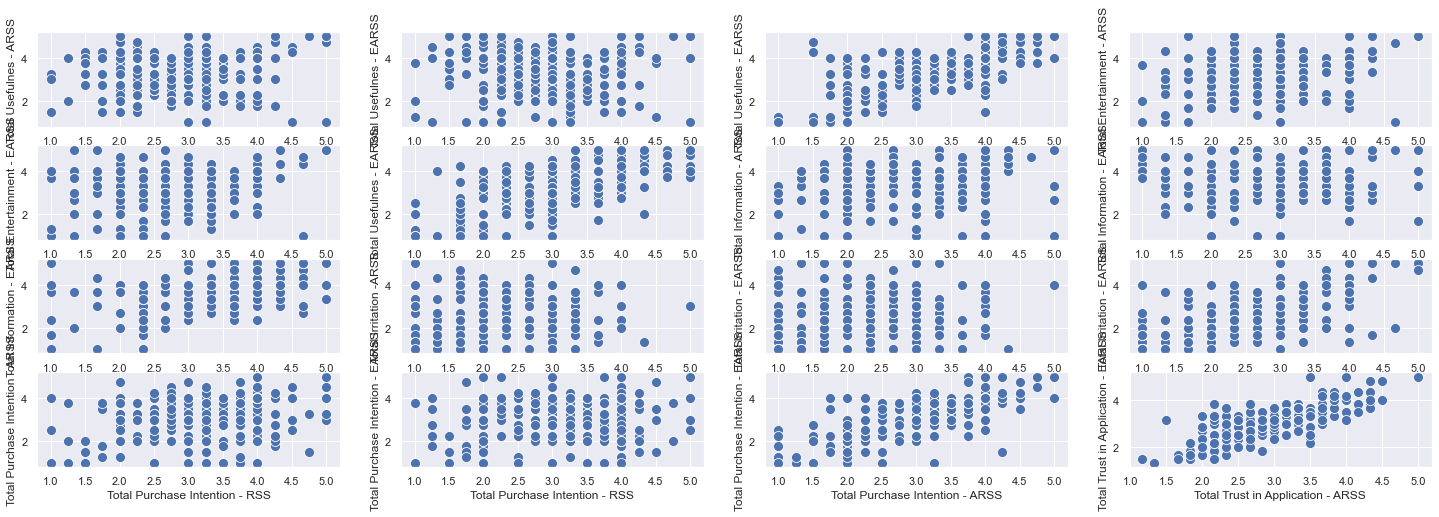

In [109]:
fig, ax =plt.subplots(4,4)
sns.scatterplot(x="Total Usefulnes - RSS", y="Total Usefulnes - ARSS", data=dataset, ax=ax[0,0], s=100)
sns.scatterplot(x="Total Usefulnes - RSS", y="Total Usefulnes - EARSS", data=dataset, ax=ax[0,1],s=100)
sns.scatterplot(x="Total Usefulnes - ARSS", y="Total Usefulnes - EARSS", data=dataset, ax=ax[0,2],s=100)

sns.scatterplot(x="Total Enjoyment - RSS", y="Total Entertainment - ARSS", data=dataset, ax=ax[0,3],s=100)
sns.scatterplot(x="Total Enjoyment - RSS", y="Total Entertainment - EARSS", data=dataset, ax=ax[1,0],s=100)
sns.scatterplot(x="Total Entertainment - ARSS", y="Total Usefulnes - EARSS", data=dataset, ax=ax[1,1],s=100)

sns.scatterplot(x="Total Information - RSS", y="Total Information - ARSS", data=dataset, ax=ax[1,2],s=100)
sns.scatterplot(x="Total Information - RSS", y="Total Information - EARSS", data=dataset, ax=ax[1,3],s=100)
sns.scatterplot(x="Total Information - ARSS", y="Total Information - EARSS", data=dataset, ax=ax[2,0],s=100)

sns.scatterplot(x="Total Irritation - RSS", y="Total Irritation -ARSS", data=dataset, ax=ax[2,1],s=100)
sns.scatterplot(x="Total Irritation - RSS", y="Total Irritation - EARSS", data=dataset, ax=ax[2,2],s=100)
sns.scatterplot(x="Total Irritation -ARSS", y="Total Irritation - EARSS", data=dataset, ax=ax[2,3],s=100)

sns.scatterplot(x="Total Purchase Intention - RSS", y="Total Purchase Intention - ARSS", data=dataset, ax=ax[3,0],s=100)
sns.scatterplot(x="Total Purchase Intention - RSS", y="Total Purchase Intention - EARSS", data=dataset, ax=ax[3,1],s=100)
sns.scatterplot(x="Total Purchase Intention - ARSS", y="Total Purchase Intention - EARSS", data=dataset, ax=ax[3,2],s=100)

sns.scatterplot(x="Total Trust in Application - ARSS", y="Total Trust in Application - EARSS", data=dataset, ax=ax[3,3],s=100)



sns.set(rc={'figure.figsize':(40.0,15.0)})
fig.show()

In [110]:
dataset['Age SPSS'].value_counts()

28 to 37     70
38 to 47     66
18 to 27     64
48 to 57     36
58 to 67     14
68 to 100     1
Name: Age SPSS, dtype: int64

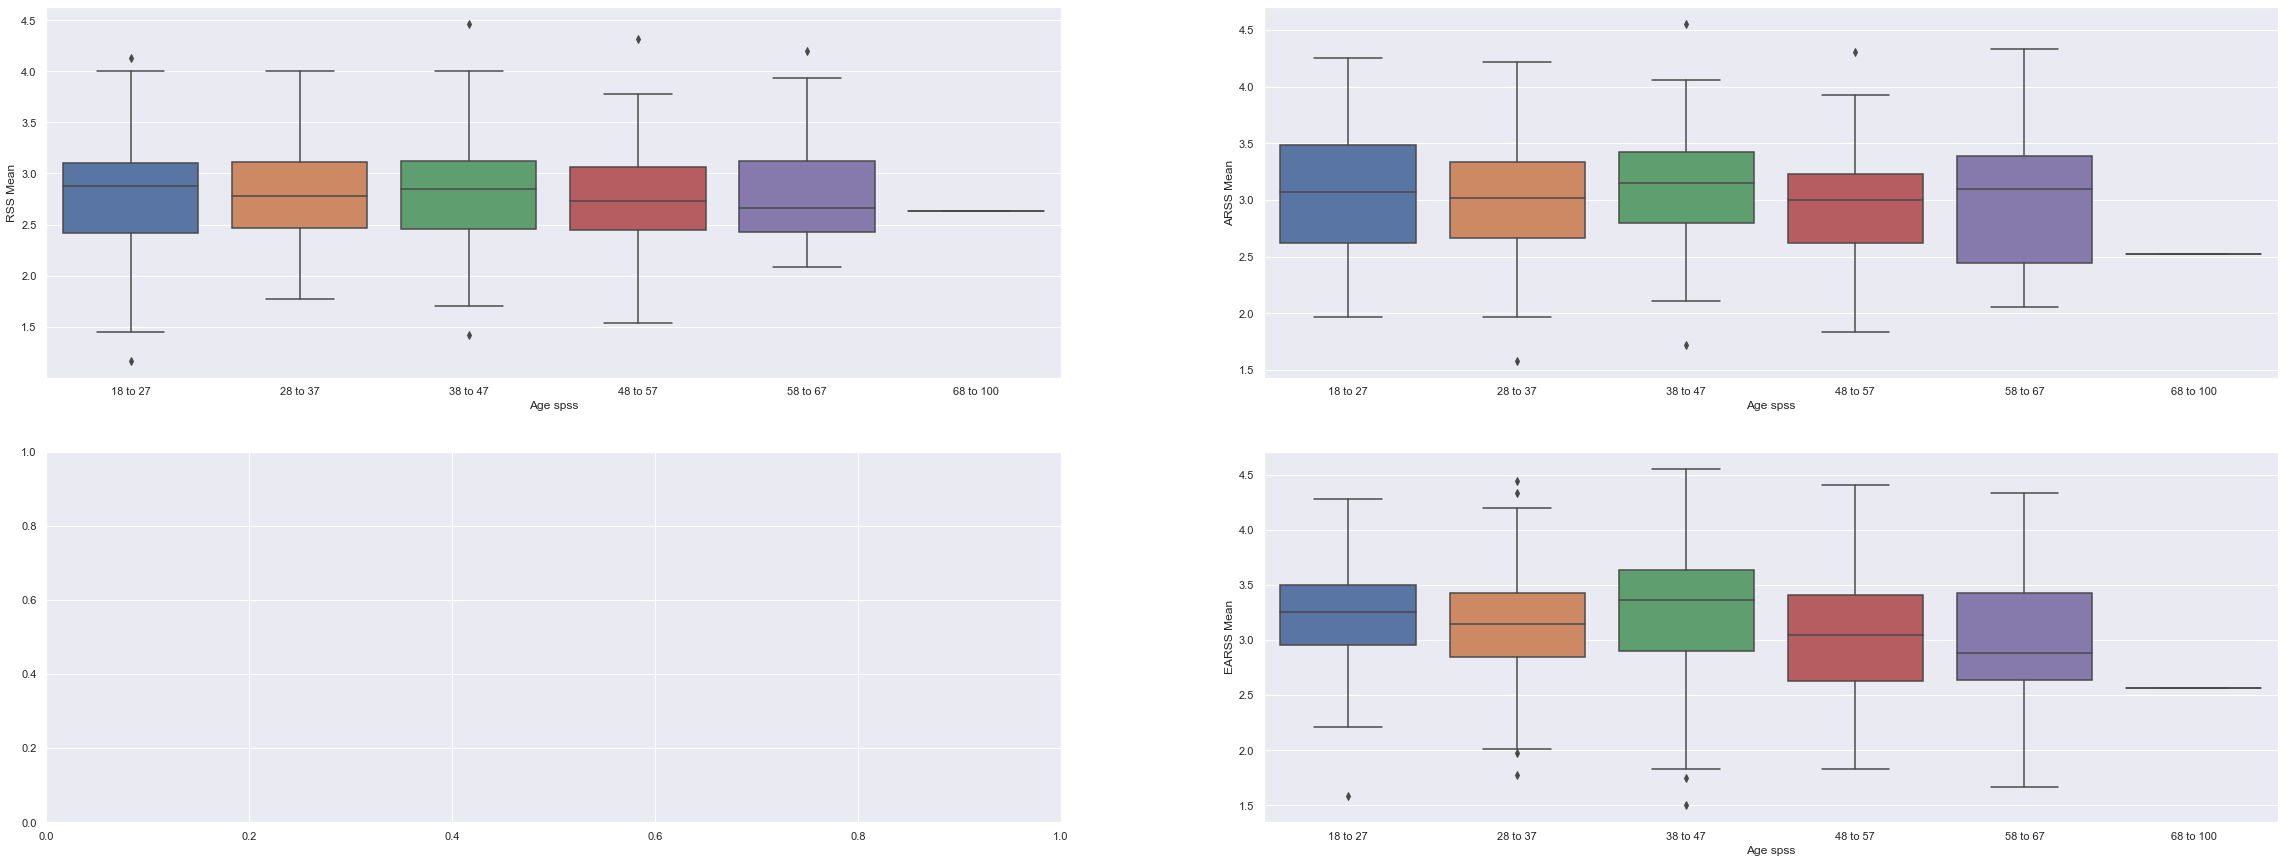

In [111]:
fig, ax = plt.subplots(2,2)
a = sns.boxplot(x="Age spss", y="RSS Mean", data=dataset, ax=ax[0,0])
a.set_xticklabels(['18 to 27', '28 to 37', '38 to 47', '48 to 57' ,'58 to 67' , '68 to 100'])
b =sns.boxplot(x="Age spss", y="ARSS Mean", data=dataset, ax=ax[0,1],)
b.set_xticklabels(['18 to 27', '28 to 37', '38 to 47', '48 to 57' ,'58 to 67' , '68 to 100'])
c = sns.boxplot(x="Age spss", y="EARSS Mean", data=dataset, ax=ax[1,1],)
c.set_xticklabels(['18 to 27', '28 to 37', '38 to 47', '48 to 57' ,'58 to 67' , '68 to 100'])
sns.set(rc={'figure.figsize':(30.0,15.0)})
fig.show()

In [112]:
import scipy.stats as stats
from researchpy import ttest as rpTtest


paired1= rpTtest(list1, list2, equal_variances = True, paired = True)
paired2= rpTtest(list1, list3, equal_variances = True, paired = True)
paired3= rpTtest(list2, list3, equal_variances = True, paired = True)

paired4= rpTtest(list4, list5, equal_variances = True, paired = True)
paired5= rpTtest(list4, list6, equal_variances = True, paired = True)
paired6= rpTtest(list5, list6, equal_variances = True, paired = True)

paired7= rpTtest(list7, list8, equal_variances = True, paired = True)
paired8= rpTtest(list7, list9, equal_variances = True, paired = True)
paired9= rpTtest(list8, list9, equal_variances = True, paired = True)

paired10= rpTtest(list10, list11, equal_variances = True, paired = True)
paired11= rpTtest(list10, list12, equal_variances = True, paired = True)
paired12= rpTtest(list11, list12, equal_variances = True, paired = True)

paired13= rpTtest(list13, list14, equal_variances = True, paired = True)
paired14= rpTtest(list13, list15, equal_variances = True, paired = True)
paired15= rpTtest(list14, list15, equal_variances = True, paired = True)

paired16= rpTtest(list16, list17, equal_variances = True, paired = True)


paired17= rpTtest(list18, list19, equal_variances = True, paired = True)
paired18= rpTtest(list18, list20, equal_variances = True, paired = True)
paired19= rpTtest(list18, list21, equal_variances = True, paired = True)


print(paired1)
print(paired2)
print(paired3)
print(paired4)
print(paired5)
print(paired6)
print(paired7)
print(paired8)
print(paired9)
print(paired10)
print(paired11)
print(paired12)
print(paired13)
print(paired14)
print(paired15)
print(paired16)

print(paired17)
print(paired18)
print(paired19)


(                 Variable      N      Mean        SD        SE  95% Conf.  \
0   Total Usefulnes - RSS  252.0  2.874008  0.795123  0.050088   2.775362   
1  Total Usefulnes - ARSS  252.0  3.241071  0.931236  0.058662   3.125538   
2                    diff  252.0 -0.367063  1.159658  0.073052  -0.510936   

   Interval  
0  2.972654  
1  3.356605  
2 -0.223191  ,                                Paired samples t-test   results
0  Difference (Total Usefulnes - RSS - Total Usef...   -0.3671
1                              Degrees of freedom =   251.0000
2                                               t =    -5.0247
3                           Two side test p value =     0.0000
4                          Difference < 0 p value =     0.0000
5                          Difference > 0 p value =     1.0000
6                                       Cohen's d =    -0.4252
7                                       Hedge's g =    -0.4246
8                                  Glass's delta1 =    -0.4616
9  

In [113]:
# from statsmodels.stats.multicomp import pairwise_tukeyhsd

# tukey = pairwise_tukeyhsd(endog= list1, groups= list2, alpha=0.05)# Significance Level

  

# tukey.plot_simultaneous()  # Plot group confidence intervals
# plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

 

# tukey.summary()

In [114]:
from scipy.stats import mannwhitneyu


statt1, pp_value1 = mannwhitneyu(list1, list2)
statt2, pp_value2 = mannwhitneyu(list1, list3)
statt3, pp_value3 = mannwhitneyu(list2, list3)

statt4, pp_value4 = mannwhitneyu(list4, list5)
statt5, pp_value5 = mannwhitneyu(list4, list6)
statt6, pp_value6 = mannwhitneyu(list5, list6)

statt7, pp_value7 = mannwhitneyu(list7, list8)
statt8, pp_value8 = mannwhitneyu(list7, list9)
statt9, pp_value9 = mannwhitneyu(list8, list9)

statt10, pp_value10 = mannwhitneyu(list10, list11)
statt11, pp_value11 = mannwhitneyu(list10, list12)
statt12, pp_value12 = mannwhitneyu(list11, list12)

statt13, pp_value13 = mannwhitneyu(list13, list14)
statt14, pp_value14 = mannwhitneyu(list13, list15)
statt15, pp_value15 = mannwhitneyu(list14, list15)

statt16, pp_value16 = mannwhitneyu(list16, list17)


statt17, pp_value17 = mannwhitneyu(list18, list19)
statt18, pp_value18 = mannwhitneyu(list18, list20)
statt19, pp_value19 = mannwhitneyu(list18, list21)


print('Statistics=%.2f, p=%.2f' % (statt1, pp_value1))
# Level of significance
alpha = 0.05
# conclusion
if pp_value1 < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')


print('Statistics=%.2f, p=%.2f' % (statt2, pp_value2))
# Level of significance
alpha = 0.05
# conclusion
if pp_value2 < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')


print('Statistics=%.2f, p=%.2f' % (statt3, pp_value3))
# Level of significance
alpha = 0.05
# conclusion
if pp_value3 < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')


print('Statistics=%.2f, p=%.2f' % (statt4, pp_value4))
# Level of significance
alpha = 0.05
# conclusion
if pp_value4 < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')


print('Statistics=%.2f, p=%.2f' % (statt5, pp_value5))
# Level of significance
alpha = 0.05
# conclusion
if pp_value5 < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')


print('Statistics=%.2f, p=%.2f' % (statt6, pp_value6))
# Level of significance
alpha = 0.05
# conclusion
if pp_value6 < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')


print('Statistics=%.2f, p=%.2f' % (statt7, pp_value7))
# Level of significance
alpha = 0.05
# conclusion
if pp_value7 < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')


print('Statistics=%.2f, p=%.2f' % (statt8, pp_value8))
# Level of significance
alpha = 0.05
# conclusion
if pp_value8 < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')


print('Statistics=%.2f, p=%.2f' % (statt9, pp_value9))
# Level of significance
alpha = 0.05
# conclusion
if pp_value9 < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')


print('Statistics=%.2f, p=%.2f' % (statt10, pp_value10))
# Level of significance
alpha = 0.05
# conclusion
if pp_value10 < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')


print('Statistics=%.2f, p=%.2f' % (statt11, pp_value11))
# Level of significance
alpha = 0.05
# conclusion
if pp_value11 < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')


print('Statistics=%.2f, p=%.2f' % (statt12, pp_value12))
# Level of significance
alpha = 0.05
# conclusion
if pp_value12 < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')


print('Statistics=%.2f, p=%.2f' % (statt13, pp_value13))
# Level of significance
alpha = 0.05
# conclusion
if pp_value13 < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')


print('Statistics=%.2f, p=%.2f' % (statt14, pp_value14))
# Level of significance
alpha = 0.05
# conclusion
if pp_value14 < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')


print('Statistics=%.2f, p=%.2f' % (statt15, pp_value15))
# Level of significance
alpha = 0.05
# conclusion
if pp_value15 < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')


print('Statistics=%.2f, p=%.2f' % (statt16, pp_value16))
# Level of significance
alpha = 0.05
# conclusion
if pp_value16 < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')


print('Statistics=%.2f, p=%.2f' % (statt17, pp_value17))
# Level of significance
alpha = 0.05
# conclusion
if pp_value17 < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')


print('Statistics=%.2f, p=%.2f' % (statt18, pp_value18))
# Level of significance
alpha = 0.05
# conclusion
if pp_value18 < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')

print('Statistics=%.2f, p=%.2f' % (statt19, pp_value19))
# Level of significance
alpha = 0.05
# conclusion
if pp_value19 < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')


Statistics=23904.50, p=0.00
Reject Null Hypothesis (Significant difference between two samples)
Statistics=20960.50, p=0.00
Reject Null Hypothesis (Significant difference between two samples)
Statistics=28913.50, p=0.08
Do not Reject Null Hypothesis (No significant difference between two samples)
Statistics=25922.50, p=0.00
Reject Null Hypothesis (Significant difference between two samples)
Statistics=24279.00, p=0.00
Reject Null Hypothesis (Significant difference between two samples)
Statistics=30090.50, p=0.31
Do not Reject Null Hypothesis (No significant difference between two samples)
Statistics=22901.50, p=0.00
Reject Null Hypothesis (Significant difference between two samples)
Statistics=17172.00, p=0.00
Reject Null Hypothesis (Significant difference between two samples)
Statistics=25515.50, p=0.00
Reject Null Hypothesis (Significant difference between two samples)
Statistics=27424.00, p=0.01
Reject Null Hypothesis (Significant difference between two samples)
Statistics=28239.50,

In [115]:

wilcoxon1= stats.wilcoxon(list1, list2)
wilcoxon2= stats.wilcoxon(list1, list3)
wilcoxon3= stats.wilcoxon(list2, list3)

wilcoxon4= stats.wilcoxon(list4, list5)
wilcoxon5= stats.wilcoxon(list4, list6)
wilcoxon6= stats.wilcoxon(list5, list6)

wilcoxon7= stats.wilcoxon(list7, list8)
wilcoxon8= stats.wilcoxon(list7, list9)
wilcoxon9= stats.wilcoxon(list8, list9)

wilcoxon10 = stats.wilcoxon(list10, list11)
wilcoxon11 = stats.wilcoxon(list10, list12)
wilcoxon12 = stats.wilcoxon(list11, list12)

wilcoxon13 = stats.wilcoxon(list13, list14)
wilcoxon14 = stats.wilcoxon(list13, list15)
wilcoxon15 = stats.wilcoxon(list14, list15)

wilcoxon16 = stats.wilcoxon(list16, list17)


wilcoxon17 = stats.wilcoxon(list18, list19)
wilcoxon18 = stats.wilcoxon(list18, list20)
wilcoxon19 = stats.wilcoxon(list18, list21)


print(wilcoxon1)
print(wilcoxon2)
print(wilcoxon3)
print(wilcoxon4)
print(wilcoxon5)
print(wilcoxon6)
print(wilcoxon7)
print(wilcoxon8)
print(wilcoxon9)
print(wilcoxon10)
print(wilcoxon11)
print(wilcoxon12)
print(wilcoxon13)
print(wilcoxon14)
print(wilcoxon15)
print(wilcoxon16)

print(wilcoxon17)
print(wilcoxon18)
print(wilcoxon19)

WilcoxonResult(statistic=6492.5, pvalue=4.5584017074435876e-07)
WilcoxonResult(statistic=6469.0, pvalue=1.678804454089815e-09)
WilcoxonResult(statistic=6930.0, pvalue=0.008390021516924247)
WilcoxonResult(statistic=6482.5, pvalue=1.3002874598249817e-05)
WilcoxonResult(statistic=6145.0, pvalue=2.799118528086923e-06)
WilcoxonResult(statistic=6053.5, pvalue=0.07553030396332747)
WilcoxonResult(statistic=5933.5, pvalue=7.661750740367791e-10)
WilcoxonResult(statistic=3815.0, pvalue=1.2694038367753251e-17)
WilcoxonResult(statistic=4616.5, pvalue=2.668701407178348e-08)
WilcoxonResult(statistic=7190.0, pvalue=0.0019246223807662484)
WilcoxonResult(statistic=7841.5, pvalue=0.009461734905729118)
WilcoxonResult(statistic=7104.5, pvalue=0.7007609904951346)
WilcoxonResult(statistic=7866.5, pvalue=0.21207567791687765)
WilcoxonResult(statistic=9924.0, pvalue=0.7833471643822214)
WilcoxonResult(statistic=5165.5, pvalue=0.08744607833026564)
WilcoxonResult(statistic=8065.0, pvalue=0.02661942822488303)
Wilco

In [116]:
kruskal1 = stats.kruskal(list1, list2, list3) #usefullnes
kruskal2 = stats.kruskal(list4, list5, list6) #entertainment
kruskal3 = stats.kruskal(list7, list8, list9) #informativeness
kruskal4 = stats.kruskal(list10, list11, list12) #irritation
kruskal5 = stats.kruskal(list13, list14, list15) #purchase intention
kruskal6 = stats.kruskal(list16, list17) # Trust
kruskal7 = stats.kruskal(list18, list19)
kruskal8 = stats.kruskal(list18, list20)
kruskal9 = stats.kruskal(list18, list21)



print(kruskal1)
print(kruskal2)
print(kruskal3)
print(kruskal4)
print(kruskal5)
print(kruskal6)
print(kruskal7)
print(kruskal8)
print(kruskal9)


KruskalResult(statistic=46.867881789519, pvalue=6.649190568088805e-11)
KruskalResult(statistic=23.4876667207117, pvalue=7.938125764695312e-06)
KruskalResult(statistic=83.74694732599869, pvalue=6.525014033194047e-19)
KruskalResult(statistic=7.94190052633668, pvalue=0.01885550692544039)
KruskalResult(statistic=1.2219435516375254, pvalue=0.5428231103119634)
KruskalResult(statistic=2.062295745921835, pvalue=0.15098255230775867)
KruskalResult(statistic=19.21327155922951, pvalue=1.1689786221136895e-05)
KruskalResult(statistic=50.38597229848613, pvalue=1.2629375093698636e-12)
KruskalResult(statistic=59.09787311375637, pvalue=1.5002131161413882e-14)


In [117]:
friedmanchisquare1 = stats.friedmanchisquare(list1, list2, list3) #usefullnes
friedmanchisquare2 = stats.friedmanchisquare(list4, list5, list6) #entertainment
friedmanchisquare3 = stats.friedmanchisquare(list7, list8, list9) #informativeness
friedmanchisquare4 = stats.friedmanchisquare(list10, list11, list12) #irritation
friedmanchisquare5 = stats.friedmanchisquare(list13, list14, list15) #purchase intention



print(friedmanchisquare1)
print(friedmanchisquare2)
print(friedmanchisquare3)
print(friedmanchisquare4)
print(friedmanchisquare5)



FriedmanchisquareResult(statistic=50.51294117647056, pvalue=1.0746181989205842e-11)
FriedmanchisquareResult(statistic=21.2430379746831, pvalue=2.4385570163584953e-05)
FriedmanchisquareResult(statistic=91.24470588235286, pvalue=1.5362569696846082e-20)
FriedmanchisquareResult(statistic=6.731893265565327, pvalue=0.034529314061373335)
FriedmanchisquareResult(statistic=1.9551451187334805, pvalue=0.37622325091245096)


In [118]:
dataset2 = pd.melt(dataset, id_vars=["Response ID"], value_vars=['Total Usefulnes - RSS', 'Total Usefulnes - ARSS', 'Total Usefulnes - EARSS',])
dataset2.columns = ["Response ID", "Testler", "Puanlar"]

anova = pg.rm_anova(data = dataset2, dv="Puanlar", subject="Response ID", within="Testler")
posthoc = pg.pairwise_ttests(data = dataset2, dv = "Puanlar", subject = "Response ID", within = "Testler", padjust="bonf")
print(anova)

    Source  ddof1  ddof2          F         p-unc     p-GG-corr       ng2  \
0  Testler      2    416  28.123093  3.502462e-12  8.334750e-10  0.056833   

        eps  sphericity   W-spher       p-spher  
0  0.757802       False  0.680394  4.905540e-18  


In [119]:
dataset3 = pd.melt(dataset, id_vars=["Response ID"], value_vars=['Total Enjoyment - RSS', 'Total Entertainment - ARSS', 'Total Entertainment - EARSS',])
dataset3.columns = ["Response ID", "Testler", "Puanlar"]

anova = pg.rm_anova(data = dataset3, dv="Puanlar", subject="Response ID", within="Testler")

posthoc = pg.pairwise_ttests(data = dataset3, dv = "Puanlar", subject = "Response ID", within = "Testler", padjust="bonf")
print(anova)

    Source  ddof1  ddof2          F         p-unc     p-GG-corr       ng2  \
0  Testler      2    416  15.953546  2.110189e-07  6.132266e-07  0.029086   

        eps  sphericity   W-spher   p-spher  
0  0.911458       False  0.902856  0.000025  


In [120]:
dataset2 = pd.melt(dataset, id_vars=["Response ID"], value_vars=['Total Information - RSS', 'Total Information - ARSS', 'Total Information - EARSS',])
dataset2.columns = ["Response ID", "Testler", "Puanlar"]

anova = pg.rm_anova(data = dataset2, dv="Puanlar", subject="Response ID", within="Testler")
anova1 = pg.sphericity(data = dataset2, dv="Puanlar", subject="Response ID", within="Testler")
print(anova)

    Source  ddof1  ddof2          F         p-unc     p-GG-corr       ng2  \
0  Testler      2    416  58.505016  4.078055e-23  2.584713e-20  0.120234   

        eps  sphericity   W-spher       p-spher  
0  0.863194       False  0.841512  1.752936e-08  


In [121]:
dataset4 = pd.melt(dataset, id_vars=["Response ID"], value_vars=['Total Irritation - RSS', 'Total Irritation -ARSS', 'Total Irritation - EARSS',])
dataset4.columns = ["Response ID", "Testler", "Puanlar"]

anova = pg.rm_anova(data = dataset4, dv="Puanlar", subject="Response ID", within="Testler")

posthoc = pg.pairwise_ttests(data = dataset4, dv = "Puanlar", subject = "Response ID", within = "Testler", padjust="bonf")
print(anova)

    Source  ddof1  ddof2          F     p-unc  p-GG-corr       ng2       eps  \
0  Testler      2    416  10.104459  0.000052    0.00015  0.018794  0.847069   

   sphericity   W-spher       p-spher  
0       False  0.819459  1.122192e-09  


In [122]:
dataset5 = pd.melt(dataset, id_vars=["Response ID"], value_vars=['Total Purchase Intention - RSS', 'Total Purchase Intention - ARSS', 'Total Purchase Intention - EARSS',])
dataset5.columns = ["Response ID", "Testler", "Puanlar"]

anova = pg.rm_anova(data = dataset5, dv="Puanlar", subject="Response ID", within="Testler")

posthoc = pg.pairwise_ttests(data = dataset5, dv = "Puanlar", subject = "Response ID", within = "Testler", padjust="bonf")
print(anova)

    Source  ddof1  ddof2         F     p-unc  p-GG-corr       ng2       eps  \
0  Testler      2    416  1.393933  0.249254   0.247603  0.002585  0.727745   

   sphericity   W-spher       p-spher  
0       False  0.625892  8.663369e-22  


**Machine Learning**

In [123]:
dataset.drop('Response ID', axis=1, inplace=True)
dataset.drop('Contact ID', axis=1, inplace=True)
dataset.drop('Date Submitted', axis=1, inplace=True)
dataset.drop('Status', axis=1, inplace=True)
dataset.drop('Legacy Comments', axis=1, inplace=True)
dataset.drop('Comments', axis=1, inplace=True)
dataset.drop('Language', axis=1, inplace=True)
dataset.drop('Referer', axis=1, inplace=True)
dataset.drop('SessionID', axis=1, inplace=True)
dataset.drop('User Agent', axis=1, inplace=True)
dataset.drop('Tags', axis=1, inplace=True)
dataset.drop('Longitude', axis=1, inplace=True)
dataset.drop('Latitude', axis=1, inplace=True)
dataset.drop('IP Address', axis=1, inplace=True)
dataset.drop('Introduction Video', axis=1, inplace=True)
dataset.drop('Other - Write In:In What country do you currently reside?', axis=1, inplace=True)
dataset.drop('State/Region', axis=1, inplace=True)
dataset.drop('Postal', axis=1, inplace=True)
dataset.drop('UID', axis=1, inplace=True)
dataset.drop('Presentation of our Augmented Reality Shopping Application:', axis=1, inplace=True)
dataset.drop('City', axis=1, inplace=True)



In [124]:
dataset.at[152, 'Age SPSS'] = '18 to 27'

In [125]:
all = pd.read_excel('C:/Users/Nasibullah Qarizada/Desktop/data science/term project/rss.xlsx')

In [126]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
from sklearn import metrics
X = all
y = dataset['rss mean']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

logreg = LogisticRegression()
X_train=np.arange(0,len(X_train),1)
X_test=np.arange(0,len(X_test),1)

logreg.fit(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))

print('Accuracy of Logistic regression classifier on training set:{:.5f}'.format(logreg.score(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))))

print('Accuracy of Logistic regression classifier on test set: {:.5f}'.format(logreg.score(np.array(X_test).reshape(-1, 1), np.array(y_test).reshape(-1, 1))))

scores = cross_val_score(logreg, X, y, cv=5)

y_pred_class = logreg.predict(np.array(X_test).reshape(-1, 1))
confusion = metrics.confusion_matrix(np.array(y_test).reshape(-1, 1), y_pred_class)
print(metrics.accuracy_score(np.array(y_test).reshape(-1, 1), y_pred_class))
print(metrics.classification_report(np.array(y_test).reshape(-1, 1), y_pred_class))
print(metrics.f1_score(np.array(y_test).reshape(-1, 1), y_pred_class, average='micro'))
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy of Logistic regression classifier on training set:0.60795
Accuracy of Logistic regression classifier on test set: 0.68421
0.6842105263157895
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.00      0.00      0.00        21
         3.0       0.68      1.00      0.81        52
         4.0       0.00      0.00      0.00         2

    accuracy                           0.68        76
   macro avg       0.17      0.25      0.20        76
weighted avg       0.47      0.68      0.56        76

0.6842105263157895
Accuracy: 0.91 (+/- 0.09)


In [128]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf.fit(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))

print('Accuracy of Decision Tree classifier on training set:{:.5f}'.format(clf.score(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))))

print('Accuracy of Decision Tree classifier on test set: {:.5f}'.format(clf.score(np.array(X_test).reshape(-1, 1), np.array(y_test).reshape(-1, 1))))



y_pred_class = clf.predict(np.array(X_test).reshape(-1, 1))
confusion = metrics.confusion_matrix(np.array(y_test).reshape(-1, 1), y_pred_class)
print(metrics.accuracy_score(np.array(y_test).reshape(-1, 1), y_pred_class))
print(metrics.classification_report(np.array(y_test).reshape(-1, 1), y_pred_class))
print(metrics.f1_score(np.array(y_test).reshape(-1, 1), y_pred_class, average='micro'))
scores = cross_val_score(clf, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy of Decision Tree classifier on training set:1.00000
Accuracy of Decision Tree classifier on test set: 0.53947
0.5394736842105263
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.29      0.24      0.26        21
         3.0       0.70      0.67      0.69        52
         4.0       0.12      0.50      0.20         2

    accuracy                           0.54        76
   macro avg       0.28      0.35      0.29        76
weighted avg       0.56      0.54      0.55        76

0.5394736842105263
Accuracy: 0.78 (+/- 0.15)


In [129]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))

print('Accuracy of KNN classifier on training set:{:.5f}'.format(knn.score(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))))

print('Accuracy of KNN classifier on test set: {:.5f}'.format(knn.score(np.array(X_test).reshape(-1, 1), np.array(y_test).reshape(-1, 1))))

y_pred_class = knn.predict(np.array(X_test).reshape(-1, 1))
confusion = metrics.confusion_matrix(np.array(y_test).reshape(-1, 1), y_pred_class)
print(metrics.accuracy_score(np.array(y_test).reshape(-1, 1), y_pred_class))
print(metrics.classification_report(np.array(y_test).reshape(-1, 1), y_pred_class))

scores = cross_val_score(knn, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy of KNN classifier on training set:0.65341
Accuracy of KNN classifier on test set: 0.64474
0.6447368421052632
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.33      0.14      0.20        21
         3.0       0.69      0.88      0.77        52
         4.0       0.00      0.00      0.00         2

    accuracy                           0.64        76
   macro avg       0.25      0.26      0.24        76
weighted avg       0.56      0.64      0.58        76

Accuracy: 0.87 (+/- 0.15)


In [130]:
from sklearn.svm import SVC
svm = SVC()

svm.fit(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))



print('Accuracy of Logistic Suppor Vector Machine on training set:{:.5f}'.format(svm.score(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))))

print('Accuracy of Logistic Suppor Vector Machine on test set: {:.5f}'.format(svm.score(np.array(X_test).reshape(-1, 1), np.array(y_test).reshape(-1, 1))))

y_pred_class = svm.predict(np.array(X_test).reshape(-1, 1))
confusion = metrics.confusion_matrix(np.array(y_test).reshape(-1, 1), y_pred_class)
print(metrics.accuracy_score(np.array(y_test).reshape(-1, 1), y_pred_class))
print(metrics.classification_report(np.array(y_test).reshape(-1, 1), y_pred_class))

scores = cross_val_score(svm, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy of Logistic Suppor Vector Machine on training set:0.60795
Accuracy of Logistic Suppor Vector Machine on test set: 0.68421
0.6842105263157895
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.00      0.00      0.00        21
         3.0       0.68      1.00      0.81        52
         4.0       0.00      0.00      0.00         2

    accuracy                           0.68        76
   macro avg       0.17      0.25      0.20        76
weighted avg       0.47      0.68      0.56        76

Accuracy: 0.94 (+/- 0.08)


In [131]:
from sklearn.ensemble import RandomForestClassifier

clf1 = RandomForestClassifier(n_estimators=100)

clf1.fit(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))

print('Accuracy of Random Forrest classifier on training set:{:.5f}'.format(clf1.score(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))))

print('Accuracy of Random Forrest classifier on test set: {:.5f}'.format(clf1.score(np.array(X_test).reshape(-1, 1), np.array(y_test).reshape(-1, 1))))

y_pred_class = clf1.predict(np.array(X_test).reshape(-1, 1))
confusion = metrics.confusion_matrix(np.array(y_test).reshape(-1, 1), y_pred_class)
print(metrics.accuracy_score(np.array(y_test).reshape(-1, 1), y_pred_class))
print(metrics.classification_report(np.array(y_test).reshape(-1, 1), y_pred_class))

scores = cross_val_score(clf1, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy of Random Forrest classifier on training set:1.00000
Accuracy of Random Forrest classifier on test set: 0.53947
0.5394736842105263
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.29      0.24      0.26        21
         3.0       0.70      0.67      0.69        52
         4.0       0.12      0.50      0.20         2

    accuracy                           0.54        76
   macro avg       0.28      0.35      0.29        76
weighted avg       0.56      0.54      0.55        76

Accuracy: 0.87 (+/- 0.08)


In [132]:
arss = pd.read_excel('C:/Users/Nasibullah Qarizada/Desktop/data science/term project/arss.xlsx')

In [133]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
from sklearn import metrics
X = arss
y = dataset['arss mean']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [134]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
X_train=np.arange(0,len(X_train),1)
X_test=np.arange(0,len(X_test),1)

logreg.fit(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))

print('Accuracy of Logistic regression classifier on training set:{:.5f}'.format(logreg.score(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))))

print('Accuracy of Logistic regression classifier on test set: {:.5f}'.format(logreg.score(np.array(X_test).reshape(-1, 1), np.array(y_test).reshape(-1, 1))))

y_pred_class = logreg.predict(np.array(X_test).reshape(-1, 1))
confusion = metrics.confusion_matrix(np.array(y_test).reshape(-1, 1), y_pred_class)
print(metrics.accuracy_score(np.array(y_test).reshape(-1, 1), y_pred_class))
print(metrics.classification_report(np.array(y_test).reshape(-1, 1), y_pred_class))

scores = cross_val_score(logreg, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy of Logistic regression classifier on training set:0.60795
Accuracy of Logistic regression classifier on test set: 0.73684
0.7368421052631579
              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00         7
         3.0       0.74      1.00      0.85        56
         4.0       0.00      0.00      0.00        12
         5.0       0.00      0.00      0.00         1

    accuracy                           0.74        76
   macro avg       0.18      0.25      0.21        76
weighted avg       0.54      0.74      0.63        76

Accuracy: 0.90 (+/- 0.07)


In [135]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf.fit(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))

print('Accuracy of Decision Tree classifier on training set:{:.5f}'.format(clf.score(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))))

print('Accuracy of Decision Tree classifier on test set: {:.5f}'.format(clf.score(np.array(X_test).reshape(-1, 1), np.array(y_test).reshape(-1, 1))))

y_pred_class = clf.predict(np.array(X_test).reshape(-1, 1))
confusion = metrics.confusion_matrix(np.array(y_test).reshape(-1, 1), y_pred_class)
print(metrics.accuracy_score(np.array(y_test).reshape(-1, 1), y_pred_class))
print(metrics.classification_report(np.array(y_test).reshape(-1, 1), y_pred_class))

scores = cross_val_score(clf, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy of Decision Tree classifier on training set:1.00000
Accuracy of Decision Tree classifier on test set: 0.48684
0.4868421052631579
              precision    recall  f1-score   support

         2.0       0.12      0.29      0.17         7
         3.0       0.76      0.57      0.65        56
         4.0       0.17      0.25      0.20        12
         5.0       0.00      0.00      0.00         1

    accuracy                           0.49        76
   macro avg       0.26      0.28      0.26        76
weighted avg       0.60      0.49      0.53        76

Accuracy: 0.78 (+/- 0.07)


In [136]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))

print('Accuracy of KNN classifier on training set:{:.5f}'.format(knn.score(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))))

print('Accuracy of KNN classifier on test set: {:.5f}'.format(knn.score(np.array(X_test).reshape(-1, 1), np.array(y_test).reshape(-1, 1))))

y_pred_class = knn.predict(np.array(X_test).reshape(-1, 1))
confusion = metrics.confusion_matrix(np.array(y_test).reshape(-1, 1), y_pred_class)
print(metrics.accuracy_score(np.array(y_test).reshape(-1, 1), y_pred_class))
print(metrics.classification_report(np.array(y_test).reshape(-1, 1), y_pred_class))

scores = cross_val_score(knn, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy of KNN classifier on training set:0.63636
Accuracy of KNN classifier on test set: 0.60526
0.6052631578947368
              precision    recall  f1-score   support

         2.0       0.23      0.43      0.30         7
         3.0       0.72      0.75      0.74        56
         4.0       0.20      0.08      0.12        12
         5.0       0.00      0.00      0.00         1

    accuracy                           0.61        76
   macro avg       0.29      0.32      0.29        76
weighted avg       0.59      0.61      0.59        76

Accuracy: 0.87 (+/- 0.07)


In [137]:
from sklearn.svm import SVC
svm = SVC()

svm.fit(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))



print('Accuracy of Support Vector Machine on training set:{:.5f}'.format(svm.score(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))))

print('Accuracy of Support Vector Machine on test set: {:.5f}'.format(svm.score(np.array(X_test).reshape(-1, 1), np.array(y_test).reshape(-1, 1))))

y_pred_class = svm.predict(np.array(X_test).reshape(-1, 1))
confusion = metrics.confusion_matrix(np.array(y_test).reshape(-1, 1), y_pred_class)
print(metrics.accuracy_score(np.array(y_test).reshape(-1, 1), y_pred_class))
print(metrics.classification_report(np.array(y_test).reshape(-1, 1), y_pred_class))

scores = cross_val_score(svm, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy of Support Vector Machine on training set:0.60795
Accuracy of Support Vector Machine on test set: 0.73684
0.7368421052631579
              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00         7
         3.0       0.74      1.00      0.85        56
         4.0       0.00      0.00      0.00        12
         5.0       0.00      0.00      0.00         1

    accuracy                           0.74        76
   macro avg       0.18      0.25      0.21        76
weighted avg       0.54      0.74      0.63        76

Accuracy: 0.92 (+/- 0.06)


In [138]:
from sklearn.ensemble import RandomForestClassifier

clf1 = RandomForestClassifier(n_estimators=100)

clf1.fit(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))

print('Accuracy of Random Forrest classifier on training set:{:.5f}'.format(clf1.score(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))))

print('Accuracy of Random Forrest classifier on test set: {:.5f}'.format(clf1.score(np.array(X_test).reshape(-1, 1), np.array(y_test).reshape(-1, 1))))

y_pred_class = clf1.predict(np.array(X_test).reshape(-1, 1))
confusion = metrics.confusion_matrix(np.array(y_test).reshape(-1, 1), y_pred_class)
print(metrics.accuracy_score(np.array(y_test).reshape(-1, 1), y_pred_class))
print(metrics.classification_report(np.array(y_test).reshape(-1, 1), y_pred_class))

scores = cross_val_score(clf1, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy of Random Forrest classifier on training set:1.00000
Accuracy of Random Forrest classifier on test set: 0.48684
0.4868421052631579
              precision    recall  f1-score   support

         2.0       0.12      0.29      0.17         7
         3.0       0.76      0.57      0.65        56
         4.0       0.17      0.25      0.20        12
         5.0       0.00      0.00      0.00         1

    accuracy                           0.49        76
   macro avg       0.26      0.28      0.26        76
weighted avg       0.60      0.49      0.53        76

Accuracy: 0.88 (+/- 0.08)


In [139]:
earss = pd.read_excel('C:/Users/Nasibullah Qarizada/Desktop/data science/term project/earss.xlsx')

In [140]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
from sklearn import metrics
X = earss
y = dataset['earss mean']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [141]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
X_train=np.arange(0,len(X_train),1)
X_test=np.arange(0,len(X_test),1)

logreg.fit(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))

print('Accuracy of Logistic regression classifier on training set:{:.5f}'.format(logreg.score(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))))

print('Accuracy of Logistic regression classifier on test set: {:.5f}'.format(logreg.score(np.array(X_test).reshape(-1, 1), np.array(y_test).reshape(-1, 1))))

y_pred_class = logreg.predict(np.array(X_test).reshape(-1, 1))
confusion = metrics.confusion_matrix(np.array(y_test).reshape(-1, 1), y_pred_class)
print(metrics.accuracy_score(np.array(y_test).reshape(-1, 1), y_pred_class))
print(metrics.classification_report(np.array(y_test).reshape(-1, 1), y_pred_class))

scores = cross_val_score(logreg, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy of Logistic regression classifier on training set:0.60227
Accuracy of Logistic regression classifier on test set: 0.60526
0.6052631578947368
              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00        10
         3.0       0.61      1.00      0.75        46
         4.0       0.00      0.00      0.00        20

    accuracy                           0.61        76
   macro avg       0.20      0.33      0.25        76
weighted avg       0.37      0.61      0.46        76

Accuracy: 0.85 (+/- 0.11)


In [142]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf.fit(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))

print('Accuracy of Decision Tree classifier on training set:{:.5f}'.format(clf.score(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))))

print('Accuracy of Decision Tree classifier on test set: {:.5f}'.format(clf.score(np.array(X_test).reshape(-1, 1), np.array(y_test).reshape(-1, 1))))

y_pred_class = clf.predict(np.array(X_test).reshape(-1, 1))
confusion = metrics.confusion_matrix(np.array(y_test).reshape(-1, 1), y_pred_class)
print(metrics.accuracy_score(np.array(y_test).reshape(-1, 1), y_pred_class))
print(metrics.classification_report(np.array(y_test).reshape(-1, 1), y_pred_class))

scores = cross_val_score(clf, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy of Decision Tree classifier on training set:1.00000
Accuracy of Decision Tree classifier on test set: 0.50000
0.5
              precision    recall  f1-score   support

         2.0       0.14      0.10      0.12        10
         3.0       0.64      0.59      0.61        46
         4.0       0.37      0.50      0.43        20

    accuracy                           0.50        76
   macro avg       0.39      0.40      0.39        76
weighted avg       0.51      0.50      0.50        76

Accuracy: 0.84 (+/- 0.05)


In [143]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))

print('Accuracy of KNN classifier on training set:{:.5f}'.format(knn.score(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))))

print('Accuracy of KNN classifier on test set: {:.5f}'.format(knn.score(np.array(X_test).reshape(-1, 1), np.array(y_test).reshape(-1, 1))))

y_pred_class = knn.predict(np.array(X_test).reshape(-1, 1))
confusion = metrics.confusion_matrix(np.array(y_test).reshape(-1, 1), y_pred_class)
print(metrics.accuracy_score(np.array(y_test).reshape(-1, 1), y_pred_class))
print(metrics.classification_report(np.array(y_test).reshape(-1, 1), y_pred_class))

scores = cross_val_score(knn, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy of KNN classifier on training set:0.66477
Accuracy of KNN classifier on test set: 0.56579
0.5657894736842105
              precision    recall  f1-score   support

         2.0       0.40      0.20      0.27        10
         3.0       0.65      0.72      0.68        46
         4.0       0.40      0.40      0.40        20

    accuracy                           0.57        76
   macro avg       0.48      0.44      0.45        76
weighted avg       0.55      0.57      0.55        76

Accuracy: 0.85 (+/- 0.06)


In [144]:
from sklearn.svm import SVC
svm = SVC()

svm.fit(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))



print('Accuracy of Support Vector Machine classifier on training set:{:.5f}'.format(svm.score(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))))

print('Accuracy of Support Vector Machine classifier on test set: {:.5f}'.format(svm.score(np.array(X_test).reshape(-1, 1), np.array(y_test).reshape(-1, 1))))

y_pred_class = svm.predict(np.array(X_test).reshape(-1, 1))
confusion = metrics.confusion_matrix(np.array(y_test).reshape(-1, 1), y_pred_class)
print(metrics.accuracy_score(np.array(y_test).reshape(-1, 1), y_pred_class))
print(metrics.classification_report(np.array(y_test).reshape(-1, 1), y_pred_class))


scores = cross_val_score(svm, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy of Support Vector Machine classifier on training set:0.60227
Accuracy of Support Vector Machine classifier on test set: 0.60526
0.6052631578947368
              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00        10
         3.0       0.61      1.00      0.75        46
         4.0       0.00      0.00      0.00        20

    accuracy                           0.61        76
   macro avg       0.20      0.33      0.25        76
weighted avg       0.37      0.61      0.46        76

Accuracy: 0.92 (+/- 0.06)


In [145]:
from sklearn.ensemble import RandomForestClassifier

clf1 = RandomForestClassifier(n_estimators=100)

clf1.fit(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))

print('Accuracy of Random Forest classifier on training set:{:.5f}'.format(clf1.score(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))))

print('Accuracy of Random Forest classifier on test set: {:.5f}'.format(clf1.score(np.array(X_test).reshape(-1, 1), np.array(y_test).reshape(-1, 1))))

y_pred_class = clf1.predict(np.array(X_test).reshape(-1, 1))
confusion = metrics.confusion_matrix(np.array(y_test).reshape(-1, 1), y_pred_class)
print(metrics.accuracy_score(np.array(y_test).reshape(-1, 1), y_pred_class))
print(metrics.classification_report(np.array(y_test).reshape(-1, 1), y_pred_class))

scores = cross_val_score(clf1, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy of Random Forest classifier on training set:1.00000
Accuracy of Random Forest classifier on test set: 0.50000
0.5
              precision    recall  f1-score   support

         2.0       0.14      0.10      0.12        10
         3.0       0.64      0.59      0.61        46
         4.0       0.37      0.50      0.43        20

    accuracy                           0.50        76
   macro avg       0.39      0.40      0.39        76
weighted avg       0.51      0.50      0.50        76

Accuracy: 0.87 (+/- 0.10)
